
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

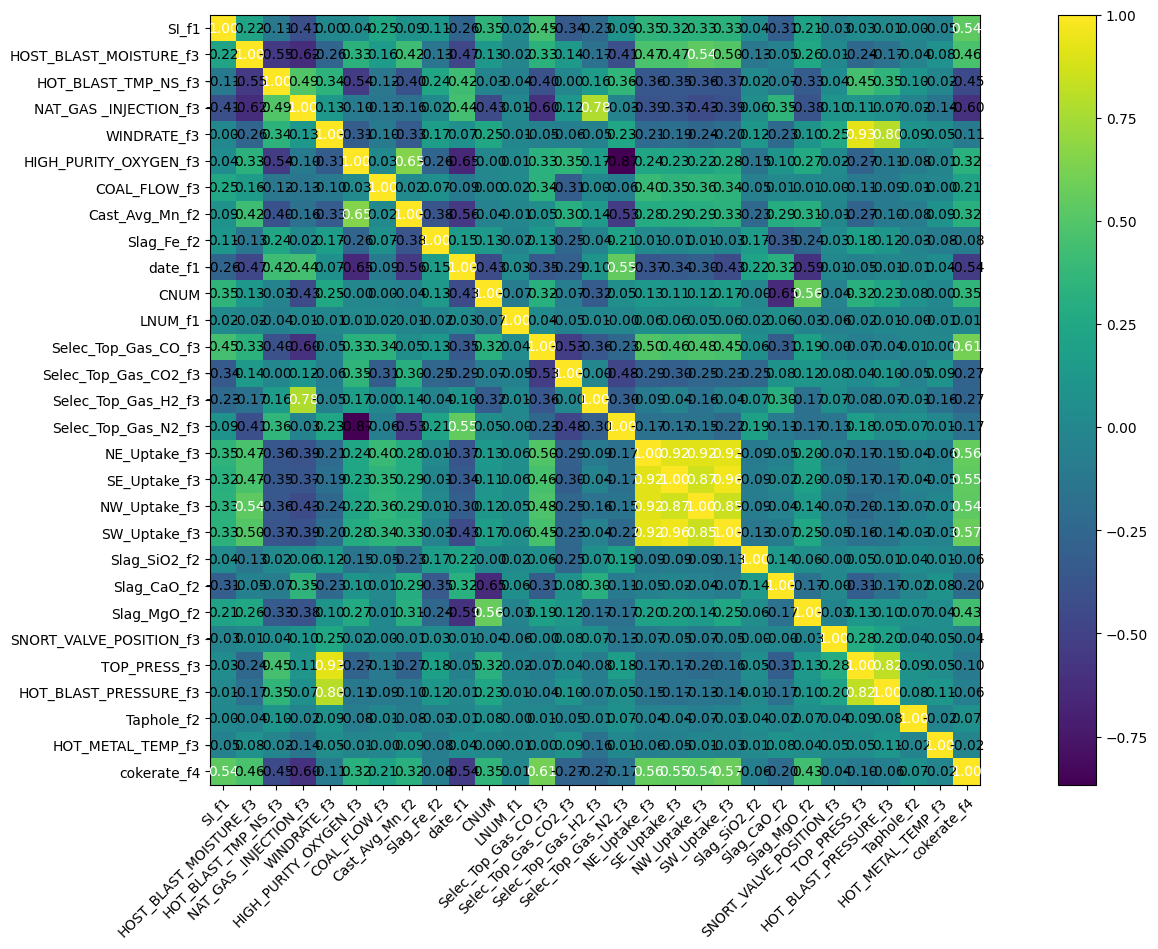

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

 
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
        
        ## Curve_SIMs = tsGPT_obj.MySoftmax(  Curve_SIMs[ [ 0, 3] ]  )
        ## loss = (0.00001)*loss_SI + Curve_SIMs[3]               

        #######################################################
        # Just like any torch.nn.xyzLoss()
        ## print( loss_change_pred.reshape(B, (T-1), E )[:,:, 2:3 ].shape )
        
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        loss_DTW = ( loss_DTW )**2
        loss_DTW = loss_DTW.mean()  

        #######################################################

        loss_total = loss_SI + loss_DTW 
        
        #######################################################
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          ### .mean()  ## Aggregate and call backward() # sdtw_criterion only
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print( [ loss_SI , loss_all ] )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  652.3570556640625
seq length of pred =  30
[ 3.49933003  2.45786598 16.48546016 31.22553383  0.98854088  0.56334089]
[tensor(1.9771, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6030, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  8.777932167053223
seq length of pred =  30
[ 3.52697924  1.65226476 10.32509502 18.23383535  0.40596077  0.32191089]
[tensor(0.8119, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2818, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  1.872086763381958
seq length of pred =  30
[ 3.50952227  1.58344865 10.01370647 16.71421573  0.36781856  0.29720449]
[tensor(0.7356, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9450, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  1.7810405492782593
seq length of pred =  30
[ 3.46017916  1.6621939  10.33545597 17.37947319  0.3856648   0.30777851]
[tensor(0.7713, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2053, device='cuda:

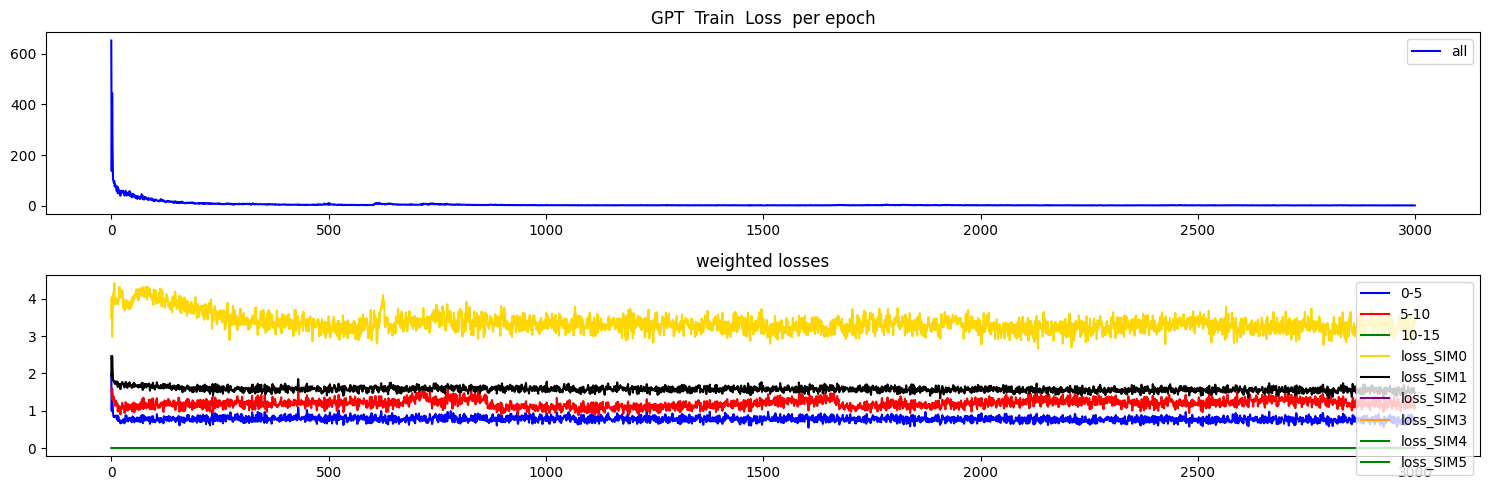

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.11369499564170837
Test MSE Loss - SI only 0-5:  0.010294508188962936
Test MSE Loss - SI only 5-10:  0.029885172843933105
Test MSE Loss - SI only 10-15:  0.5560801029205322
mae, mse, rmse, mape, mspe, rse, corr
(0.22092418, 0.113694996, 0.33718687, 3.2256684, 47.50901, 1.0849696)
Testing R**2 - SI only:  -0.17715904594706267
Testing R**2 - SI only:  -0.17715904594706267
Testing R**2 - All features:  0.9926387800778094
Testing R**2 - (f2) - SI full:  -1.2518553040826679


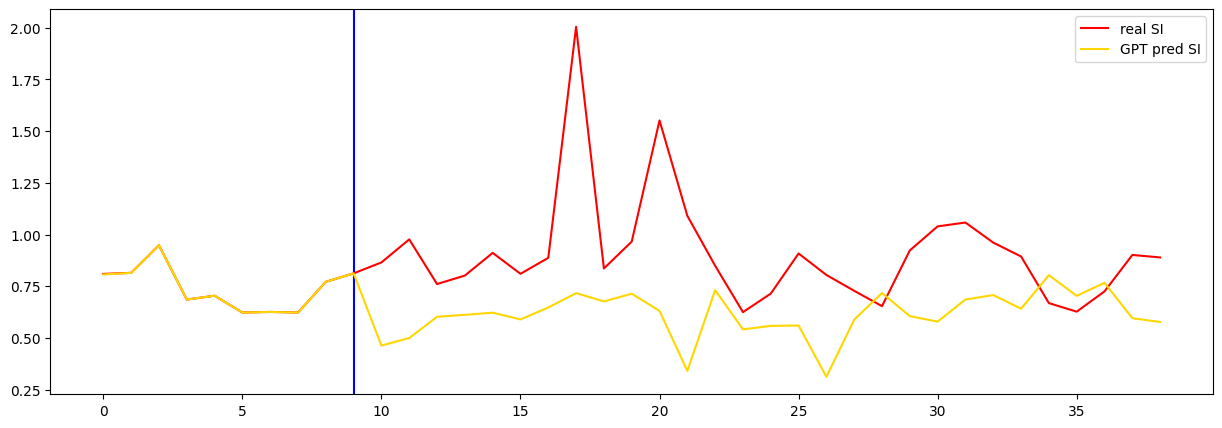

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  181.02406311035156
seq length of pred =  30
[ 3.17841159  2.02605704 12.53505208 23.53340278  0.56161173  0.41438067]
[tensor(1.1232, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2917, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  3.3811302185058594
seq length of pred =  30
[ 3.71511704  1.31239113  8.24724256 14.93173449  0.27278679  0.26383913]
[tensor(0.5456, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8494, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  2.6581530570983887
seq length of pred =  30
[ 3.1986514   1.51562507  9.64487179 16.93912887  0.39608719  0.30414391]
[tensor(0.7922, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1303, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  1.955064058303833
seq length of pred =  30
[ 3.17469451  1.53520494  9.74714475 17.20599369  0.41402025  0.30868845]
[tensor(0.8280, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0727, device='cud

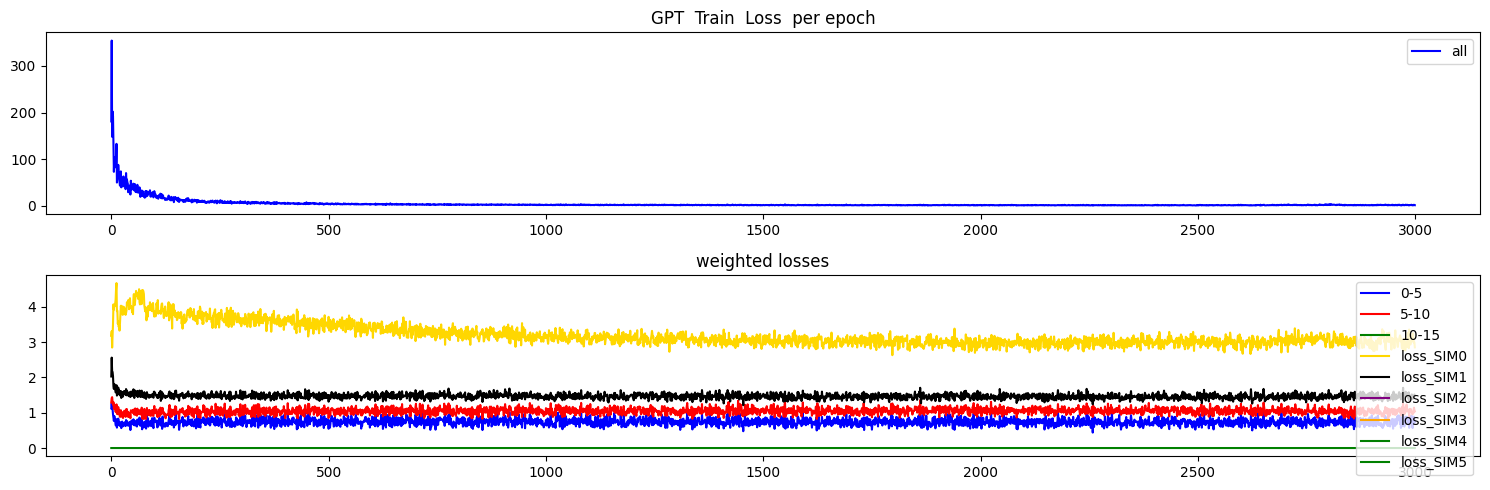

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.1321580559015274
Test MSE Loss - SI only 0-5:  0.010294508188962936
Test MSE Loss - SI only 5-10:  0.010016865096986294
Test MSE Loss - SI only 10-15:  0.5790481567382812
mae, mse, rmse, mape, mspe, rse, corr
(0.24753812, 0.13215806, 0.3635355, 3.8972883, 59.878857, 1.1697519)
Testing R**2 - SI only:  -0.36831920237853333
Testing R**2 - SI only:  -0.36831920237853333
Testing R**2 - All features:  0.9790619961674067
Testing R**2 - (f2) - SI full:  -1.1876112990491539


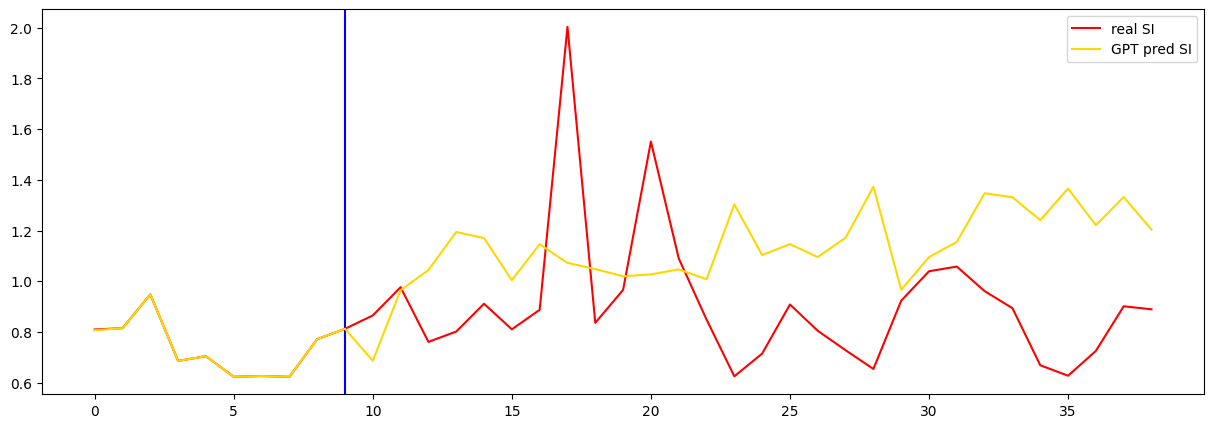

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  371.8912048339844
seq length of pred =  30
[ 3.80379827  2.31367476 14.38881347 26.98139155  0.73797299  0.47897148]
[tensor(1.4759, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1755, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.328961372375488
seq length of pred =  30
[ 3.48183934  1.54185005  9.76364157 16.29043708  0.36260243  0.28988487]
[tensor(0.7252, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7506, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  15.657949447631836
seq length of pred =  30
[ 3.45361184  1.63488934  9.97495147 16.55755035  0.38836301  0.29591339]
[tensor(0.7767, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7485, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  3.929785966873169
seq length of pred =  30
[ 2.96476753  1.57923602  9.25749682 15.79350872  0.32382712  0.27874882]
[tensor(0.6477, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.6293, device='cuda

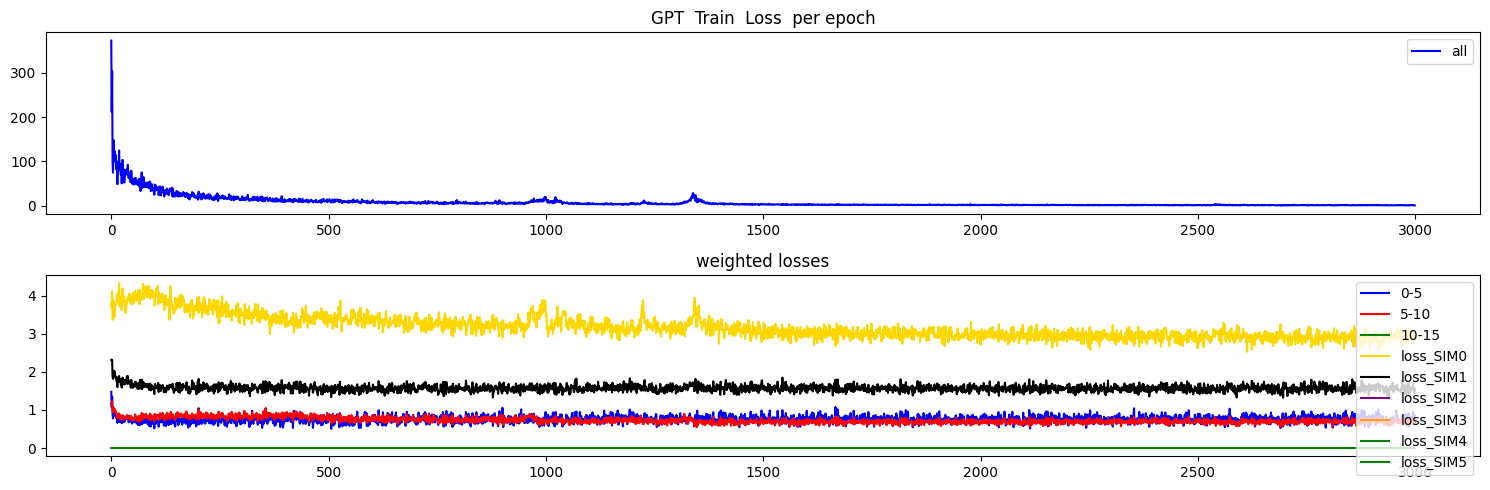

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.11442355811595917
Test MSE Loss - SI only 0-5:  0.010294508188962936
Test MSE Loss - SI only 5-10:  0.03193804249167442
Test MSE Loss - SI only 10-15:  0.5694606900215149
mae, mse, rmse, mape, mspe, rse, corr
(0.2163564, 0.11442354, 0.33826548, 3.1982596, 47.155113, 1.0884403)
Testing R**2 - SI only:  -0.18470217184150983
Testing R**2 - SI only:  -0.18470217184150983
Testing R**2 - All features:  0.99167041990904
Testing R**2 - (f2) - SI full:  -3.037980612107602


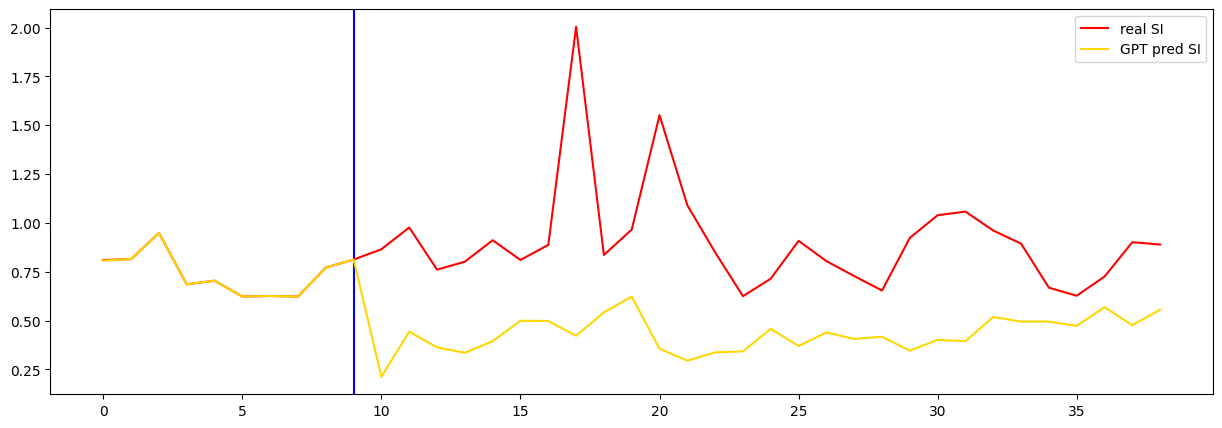

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  385.1249694824219
seq length of pred =  30
[ 3.52415961  2.24661581 13.33909358 26.99273684  0.73554923  0.48008794]
[tensor(1.4711, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1471, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  14.137152671813965
seq length of pred =  30
[ 3.48664666  1.69753136 10.74883992 18.37955206  0.4476704   0.32815575]
[tensor(0.8953, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8851, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.19940185546875
seq length of pred =  30
[ 3.28673309  1.78175203 10.83240368 17.88641105  0.45814398  0.32145555]
[tensor(0.9163, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8385, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  6.929222106933594
seq length of pred =  30
[ 3.26772058  1.80214229 10.59117166 18.05154819  0.42623617  0.32117901]
[tensor(0.8525, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7566, device='cuda:

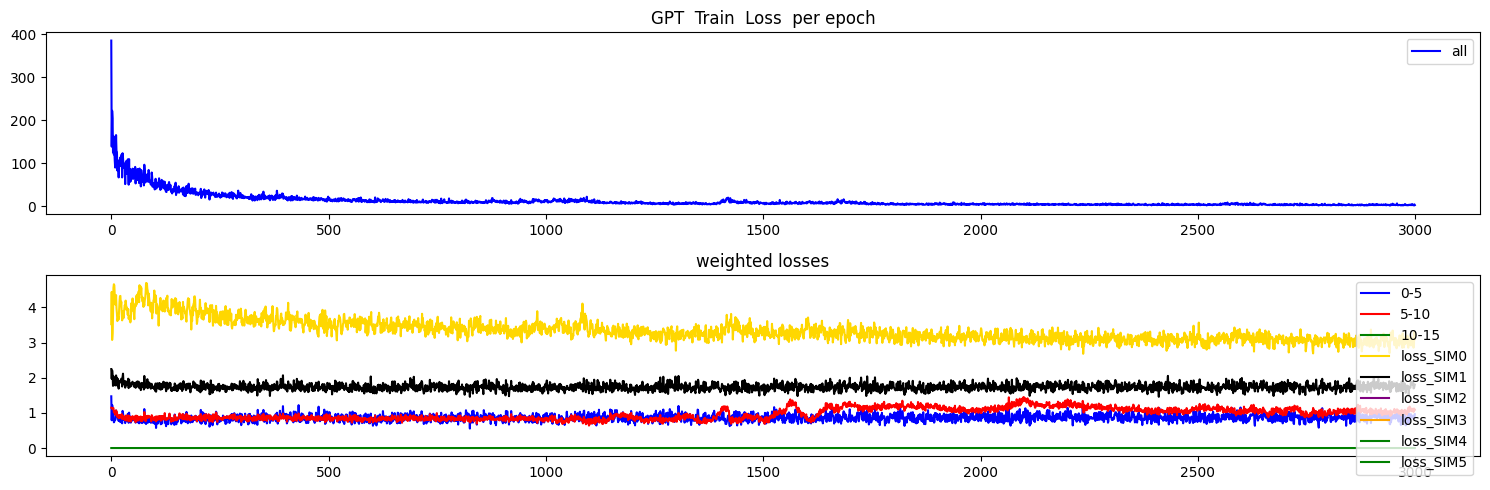

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.11112962663173676
Test MSE Loss - SI only 0-5:  0.010294508188962936
Test MSE Loss - SI only 5-10:  0.046974360942840576
Test MSE Loss - SI only 10-15:  0.4475230276584625
mae, mse, rmse, mape, mspe, rse, corr
(0.2363332, 0.11112963, 0.33336112, 3.260036, 46.77776, 1.0726594)
Testing R**2 - SI only:  -0.15059806146401566
Testing R**2 - SI only:  -0.15059806146401566
Testing R**2 - All features:  0.9450092080510868
Testing R**2 - (f2) - SI full:  -0.6737321351527934


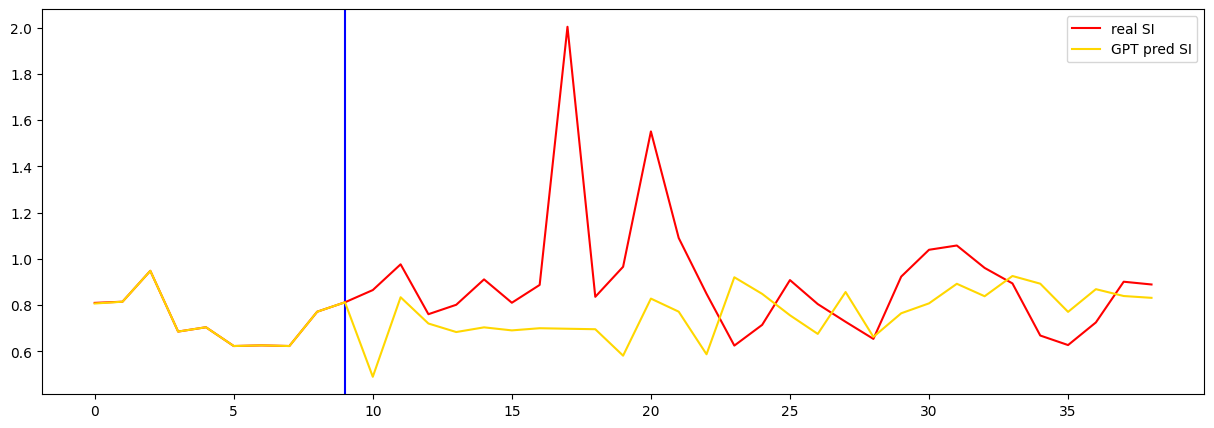

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  198.53977966308594
seq length of pred =  30
[ 3.71186921  2.2941665  15.36637134 25.04232701  0.68162102  0.44261256]
[tensor(1.3632, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1804, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  3.377723217010498
seq length of pred =  30
[ 2.27536861  2.16623317 12.90947412 19.22566698  0.56047784  0.34999149]
[tensor(1.1210, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0135, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  2.353689432144165
seq length of pred =  30
[ 2.51197425  2.33364788 13.99092446 20.29683778  0.59900341  0.37013102]
[tensor(1.1980, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0202, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  1.572100043296814
seq length of pred =  30
[ 2.54148779  2.08622405 12.04571948 17.69171457  0.47852636  0.31852215]
[tensor(0.9571, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9400, device='cuda:

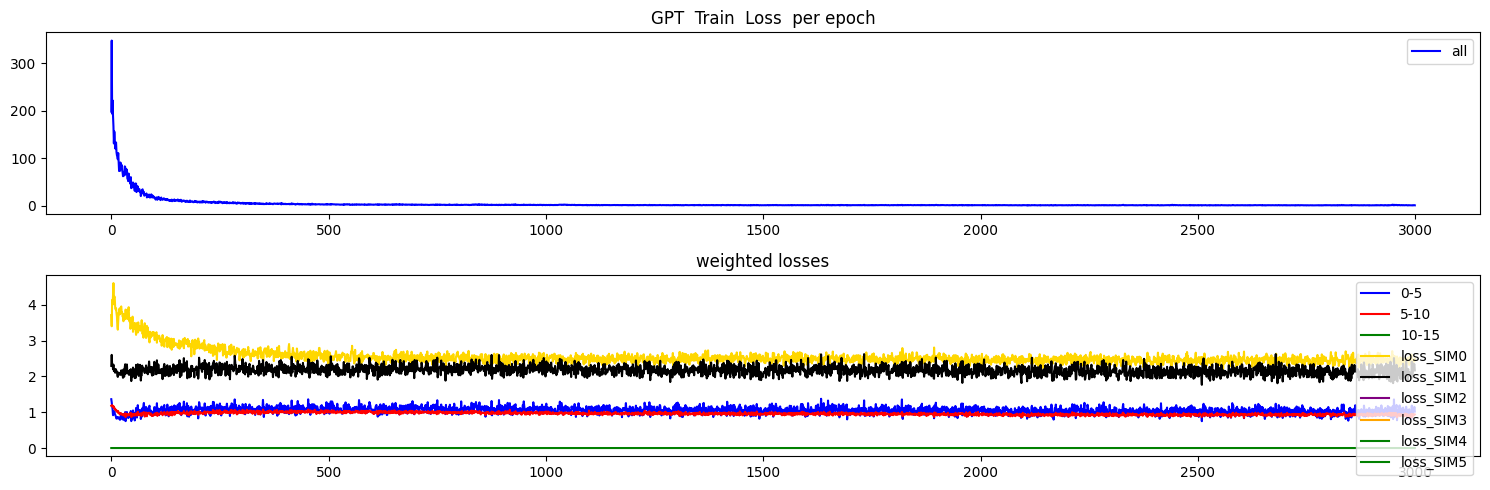

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.026996606960892677
Test MSE Loss - SI only 0-5:  0.0312558189034462
Test MSE Loss - SI only 5-10:  0.044424716383218765
Test MSE Loss - SI only 10-15:  0.03927760571241379
mae, mse, rmse, mape, mspe, rse, corr
(0.12736595, 0.026996607, 0.16430645, 3.8107252, 83.28978, 1.895017)
Testing R**2 - SI only:  -2.5910899414104067
Testing R**2 - SI only:  -2.5910899414104067
Testing R**2 - All features:  0.9520523710000399
Testing R**2 - (f2) - SI full:  -24.6753056402089


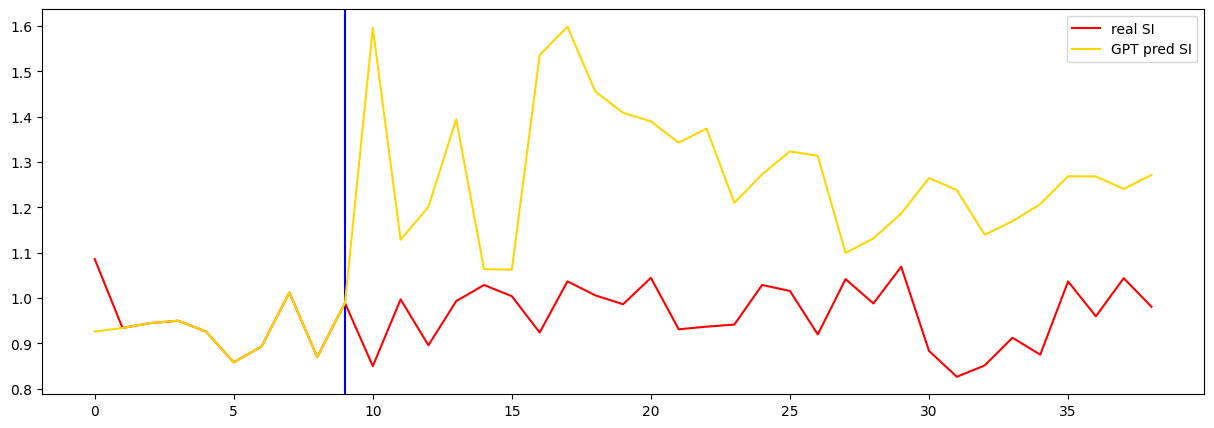

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  401.1630554199219
seq length of pred =  30
[ 3.62990971  2.50606739 16.95598376 29.53149028  0.95788453  0.53808444]
[tensor(1.9158, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3223, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.687131881713867
seq length of pred =  30
[ 2.85413025  2.03528649 14.37504993 22.01249002  0.6628847   0.39747534]
[tensor(1.3258, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0115, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  8.86373233795166
seq length of pred =  30
[ 2.85014315  2.24977673 14.36579064 22.05244799  0.6791784   0.40344133]
[tensor(1.3584, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0934, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  8.259544372558594
seq length of pred =  30
[ 2.592117    2.14052013 14.21101665 21.89085371  0.67343089  0.40790393]
[tensor(1.3469, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2271, device='cuda:0

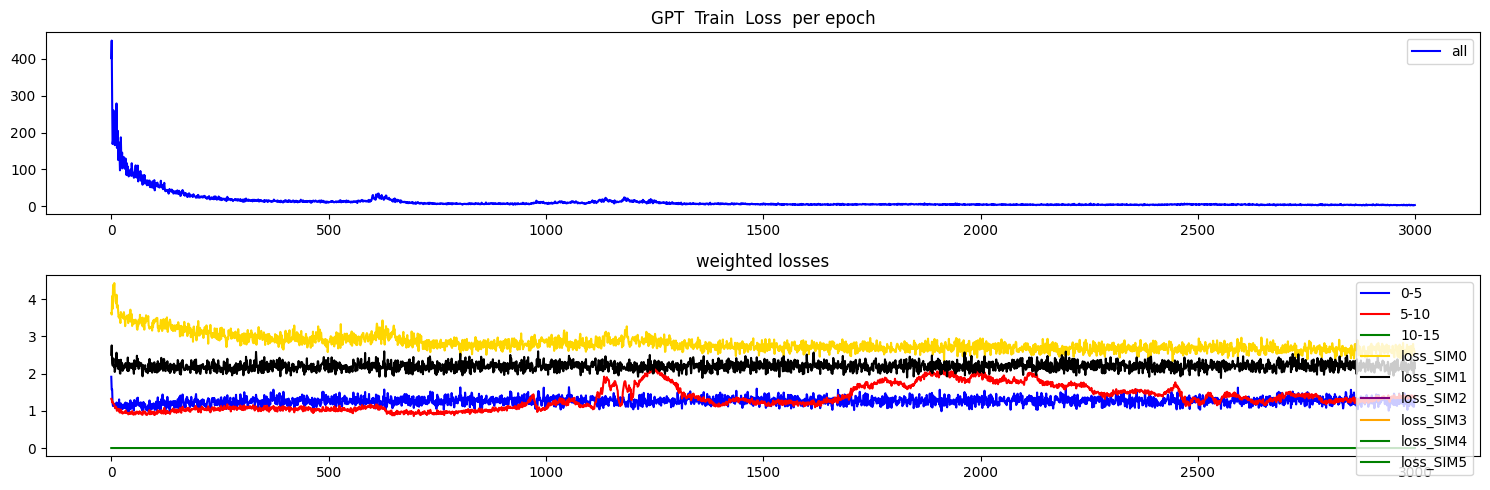

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.019611958414316177
Test MSE Loss - SI only 0-5:  0.0312558189034462
Test MSE Loss - SI only 5-10:  0.01767578534781933
Test MSE Loss - SI only 10-15:  0.02093161828815937
mae, mse, rmse, mape, mspe, rse, corr
(0.100993715, 0.019611958, 0.1400427, 1.7184231, 6.2380633, 1.6151729)
Testing R**2 - SI only:  -1.608783674563751
Testing R**2 - SI only:  -1.608783674563751
Testing R**2 - All features:  0.9180954483745732
Testing R**2 - (f2) - SI full:  -6.815788394047477


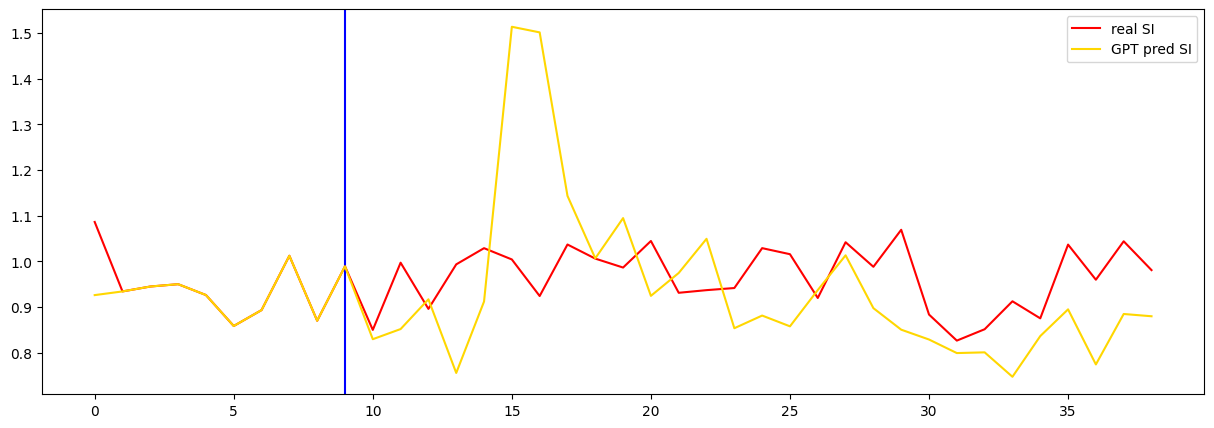

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  821.0664672851562
seq length of pred =  30
[ 2.98864263  2.67444345 16.56284953 32.1424926   1.08792926  0.58092527]
[tensor(2.1759, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3272, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  22.1923770904541
seq length of pred =  30
[ 3.33224234  1.90338084 12.24963978 20.98490196  0.52249787  0.37534399]
[tensor(1.0450, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9936, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  8.240233421325684
seq length of pred =  30
[ 2.99966906  1.87557129 13.04380035 20.28002649  0.59698158  0.37503727]
[tensor(1.1940, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9915, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  14.377359390258789
seq length of pred =  30
[ 3.02493974  2.04725708 13.73191371 21.5409276   0.65165043  0.39642108]
[tensor(1.3033, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9809, device='cuda:0

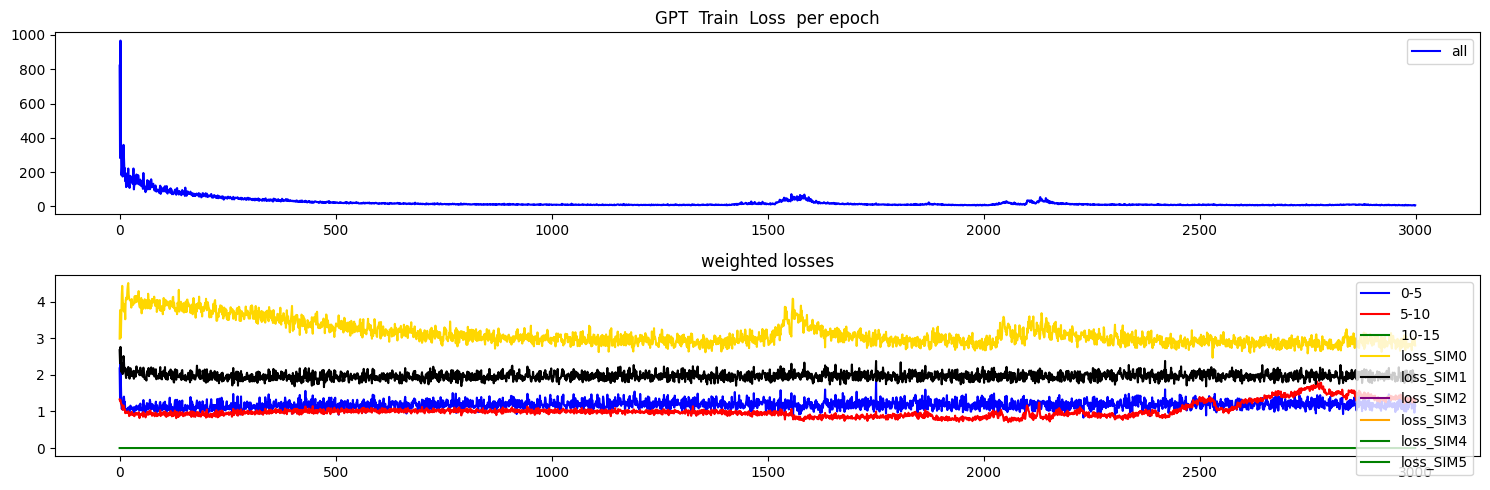

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.040063221007585526
Test MSE Loss - SI only 0-5:  0.0312558189034462
Test MSE Loss - SI only 5-10:  0.07511486113071442
Test MSE Loss - SI only 10-15:  0.02575325407087803
mae, mse, rmse, mape, mspe, rse, corr
(0.16162185, 0.04006322, 0.20015799, 3.718556, 55.41082, 2.3085086)
Testing R**2 - SI only:  -4.329211221714343
Testing R**2 - SI only:  -4.329211221714343
Testing R**2 - All features:  0.9873603687948901
Testing R**2 - (f2) - SI full:  -11.222299994790543


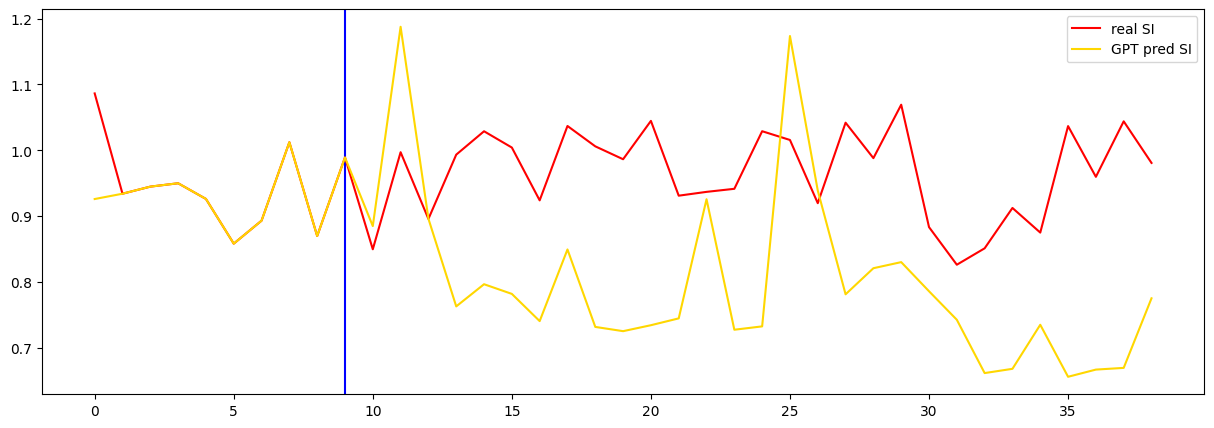

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  467.26318359375
seq length of pred =  30
[ 3.07155465  2.52277273 17.4202035  29.98213484  0.99890236  0.54870041]
[tensor(1.9978, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2358, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  35.53103256225586
seq length of pred =  30
[ 3.5053428   2.08249116 13.03292206 22.42424672  0.64248482  0.40846494]
[tensor(1.2850, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0195, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  21.592641830444336
seq length of pred =  30
[ 3.21364439  2.16683184 12.4172194  21.54185506  0.5657471   0.38568421]
[tensor(1.1315, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9203, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  19.978151321411133
seq length of pred =  30
[ 3.0171326   2.10969389 13.21628943 23.01463893  0.66117463  0.42086003]
[tensor(1.3223, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1174, device='cuda:0

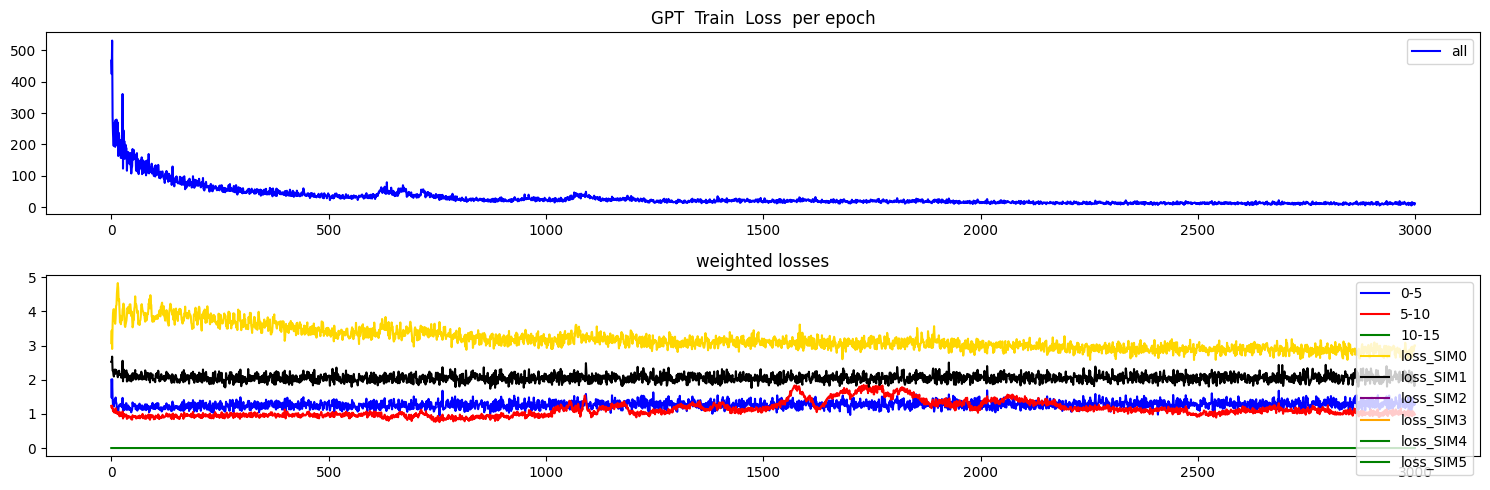

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.016625024378299713
Test MSE Loss - SI only 0-5:  0.0312558189034462
Test MSE Loss - SI only 5-10:  0.02139076218008995
Test MSE Loss - SI only 10-15:  0.011230281554162502
mae, mse, rmse, mape, mspe, rse, corr
(0.100931205, 0.016625023, 0.12893806, 2.0414674, 8.5379095, 1.4870982)
Testing R**2 - SI only:  -1.2114614819019014
Testing R**2 - SI only:  -1.2114614819019014
Testing R**2 - All features:  0.9636625833428274
Testing R**2 - (f2) - SI full:  -4.137668247657176


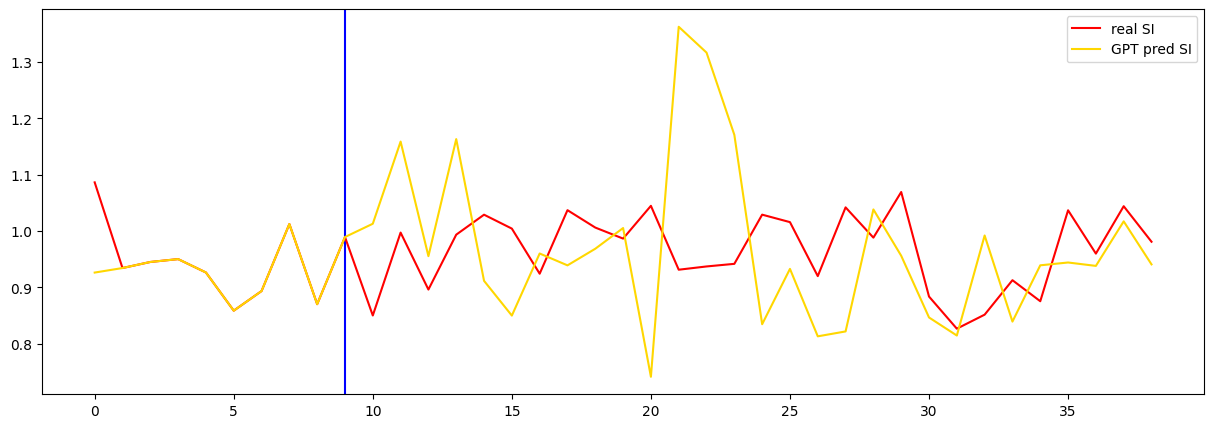

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  776.015380859375
seq length of pred =  30
[ 3.70621084  2.49236032 15.37006556 31.35030376  0.95169736  0.5573444 ]
[tensor(1.9034, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5571, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  2.3437061309814453
seq length of pred =  30
[ 2.55631828  1.93960106  9.67120294 16.52845015  0.41961686  0.29444155]
[tensor(0.8392, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1217, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  3.037832021713257
seq length of pred =  30
[ 2.83365529  1.95028928 10.0126102  17.381661    0.42279079  0.30591665]
[tensor(0.8456, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0692, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  1.3491507768630981
seq length of pred =  30
[ 2.59909861  1.92203567  9.32188739 15.71254559  0.37585842  0.27632855]
[tensor(0.7517, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9961, device='cuda:

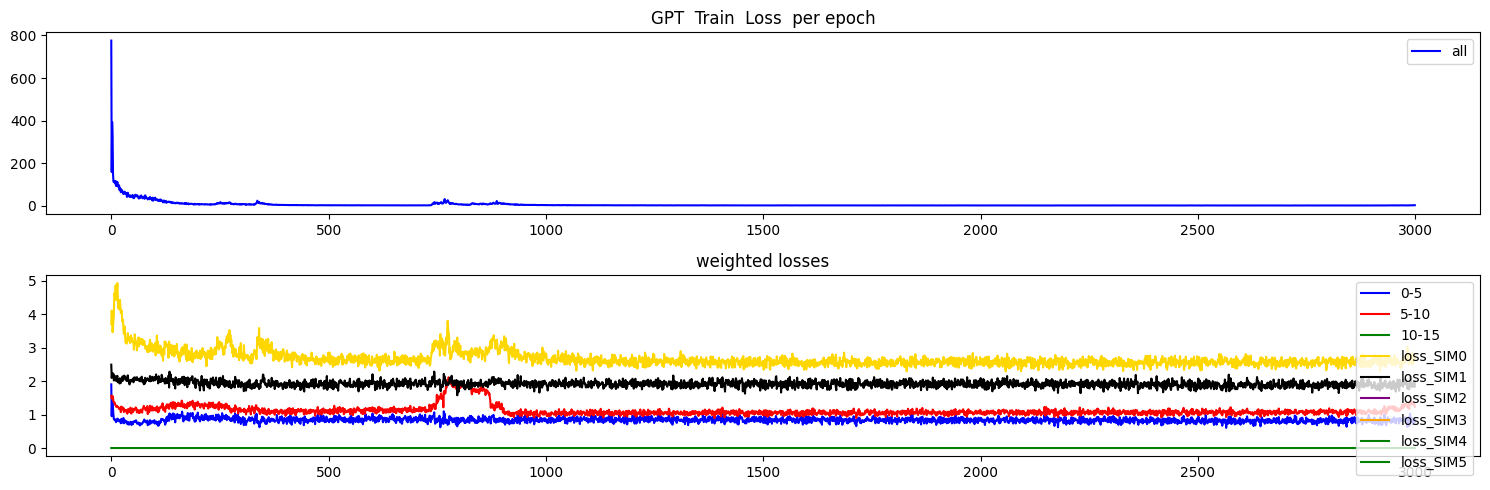

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.07003067433834076
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.058019597083330154
Test MSE Loss - SI only 10-15:  0.09554998576641083
mae, mse, rmse, mape, mspe, rse, corr
(0.23070629, 0.07003067, 0.2646331, 15.327403, 2967.8313, 2.2081852)
Testing R**2 - SI only:  -3.8760822737519405
Testing R**2 - SI only:  -3.8760822737519405
Testing R**2 - All features:  0.9674038585159792
Testing R**2 - (f2) - SI full:  -49.6280768359612


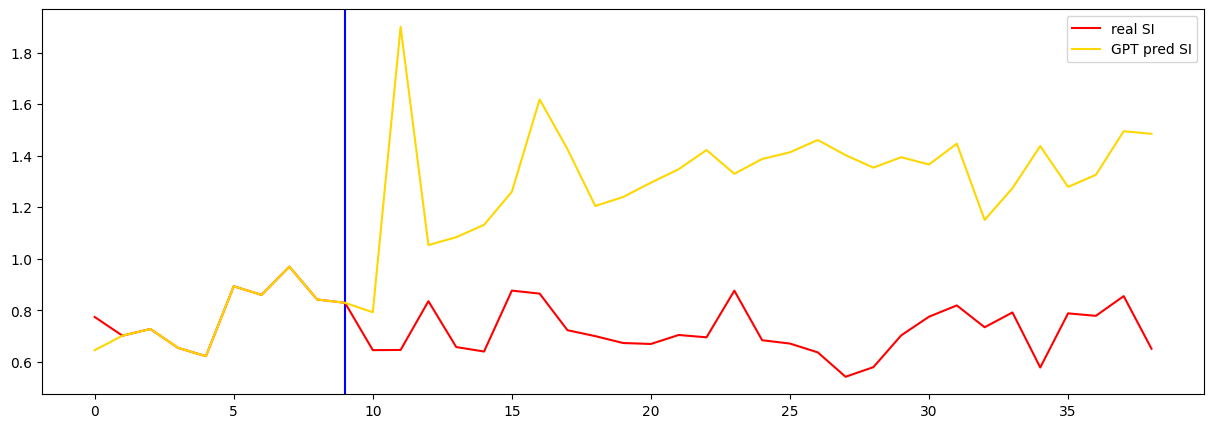

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  918.2088012695312
seq length of pred =  30
[ 3.49087449  2.80503636 16.95665326 31.24270222  1.06161426  0.56063528]
[tensor(2.1232, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3687, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  6.381877899169922
seq length of pred =  30
[ 3.13906399  1.57881294  9.53860196 15.82368174  0.34992019  0.28067325]
[tensor(0.6998, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0194, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  3.669574499130249
seq length of pred =  30
[ 3.00455248  1.94067042 10.89676491 18.39860341  0.54357674  0.33024464]
[tensor(1.0872, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2136, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  2.189842700958252
seq length of pred =  30
[ 3.06366232  1.70394949  9.77249572 16.71260513  0.3889044   0.29348169]
[tensor(0.7778, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9933, device='cuda:0

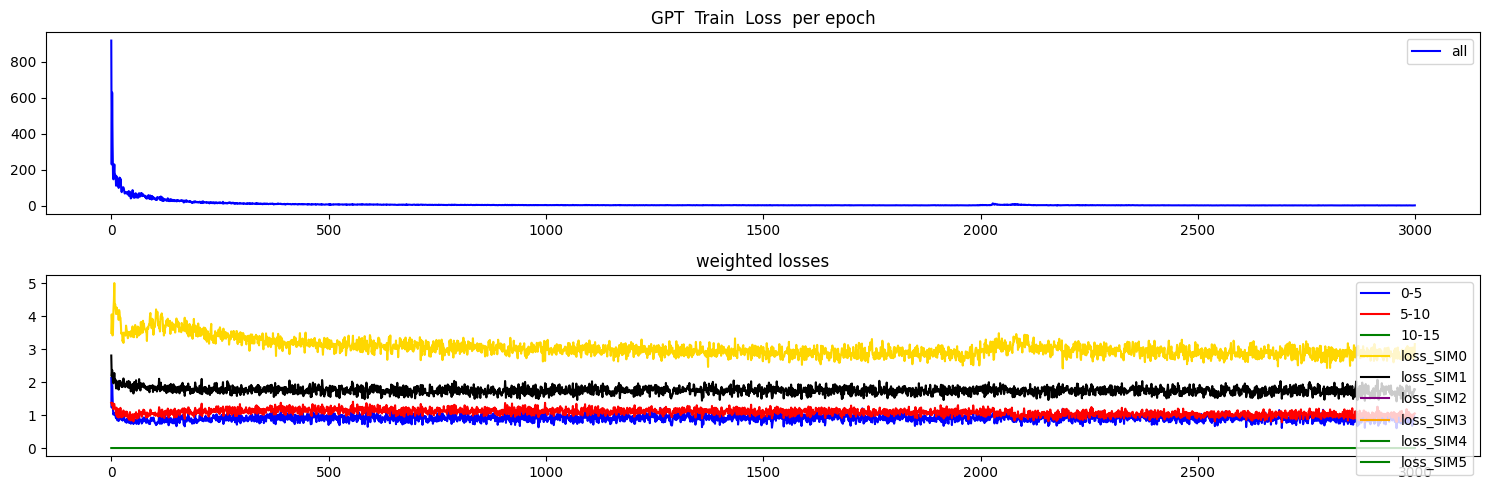

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.09356986731290817
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.11833186447620392
Test MSE Loss - SI only 10-15:  0.1103748232126236
mae, mse, rmse, mape, mspe, rse, corr
(0.27414298, 0.09356987, 0.30589193, 21.663656, 7032.274, 2.5524623)
Testing R**2 - SI only:  -5.515064659453938
Testing R**2 - SI only:  -5.515064659453938
Testing R**2 - All features:  0.9837338685781248
Testing R**2 - (f2) - SI full:  -24.647022873098447


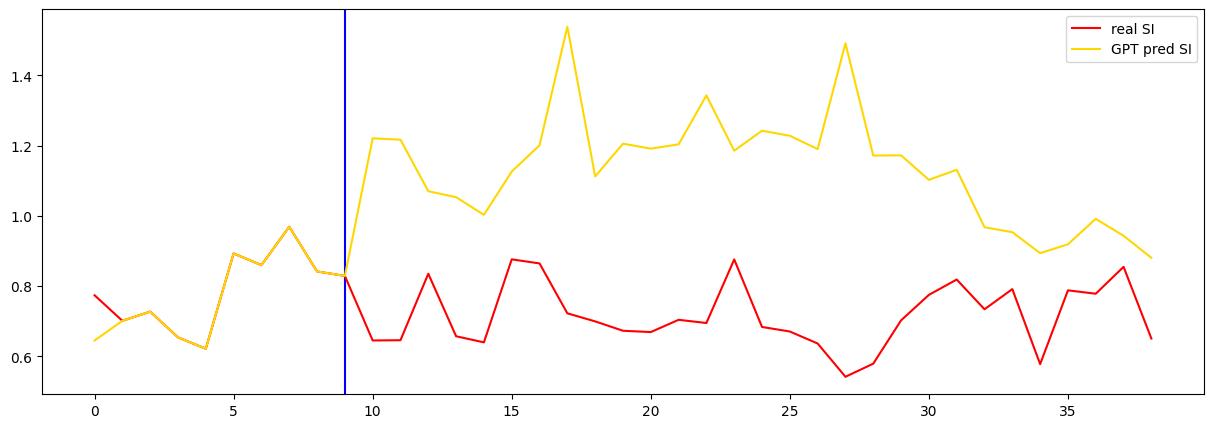

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  669.4830932617188
seq length of pred =  30
[ 3.66391424  2.68072091 16.46180508 30.72819352  0.94677007  0.54407049]
[tensor(1.8935, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2238, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  10.765576362609863
seq length of pred =  30
[ 3.30478641  1.72814742 10.63873278 18.58665207  0.47210924  0.33155463]
[tensor(0.9442, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9088, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  4.612789154052734
seq length of pred =  30
[ 3.11591687  1.75168788 10.56449645 17.76809817  0.50823297  0.32049755]
[tensor(1.0165, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8583, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  2.681396007537842
seq length of pred =  30
[ 2.9801352   1.66300343  9.72802384 16.50439038  0.37207484  0.2938807 ]
[tensor(0.7441, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7919, device='cuda:

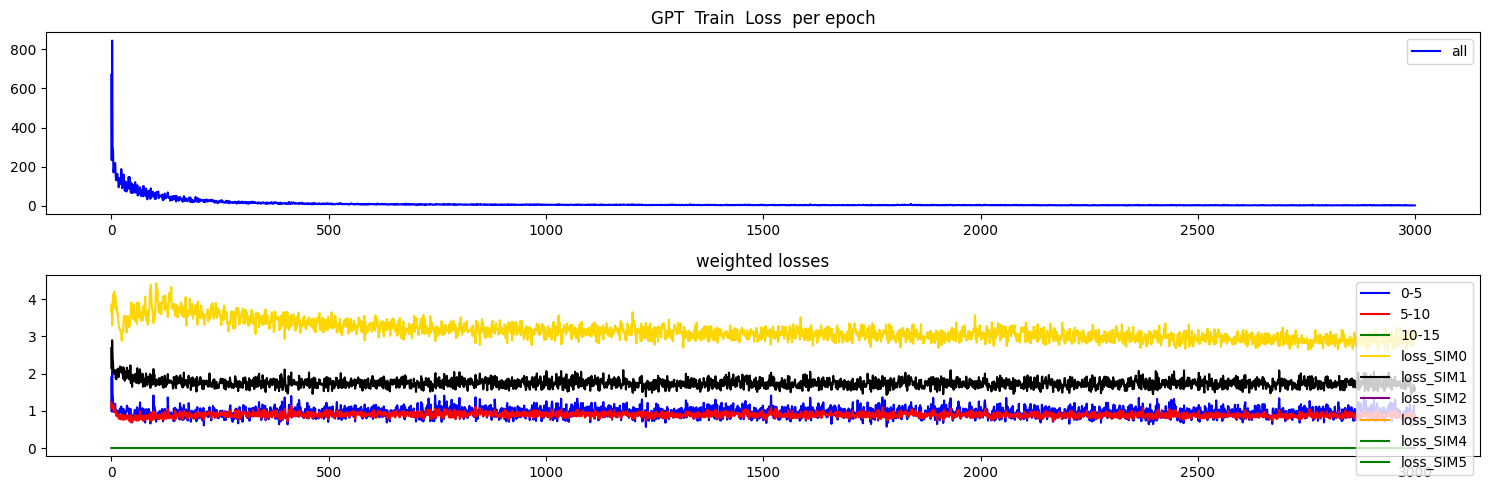

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.025953879579901695
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.03233348950743675
Test MSE Loss - SI only 10-15:  0.03734981268644333
mae, mse, rmse, mape, mspe, rse, corr
(0.12472692, 0.02595388, 0.16110207, 8.753445, 1426.7488, 1.3442886)
Testing R**2 - SI only:  -0.8071118993312023
Testing R**2 - SI only:  -0.8071118993312023
Testing R**2 - All features:  0.9754275694217543
Testing R**2 - (f2) - SI full:  -22.907943673273405


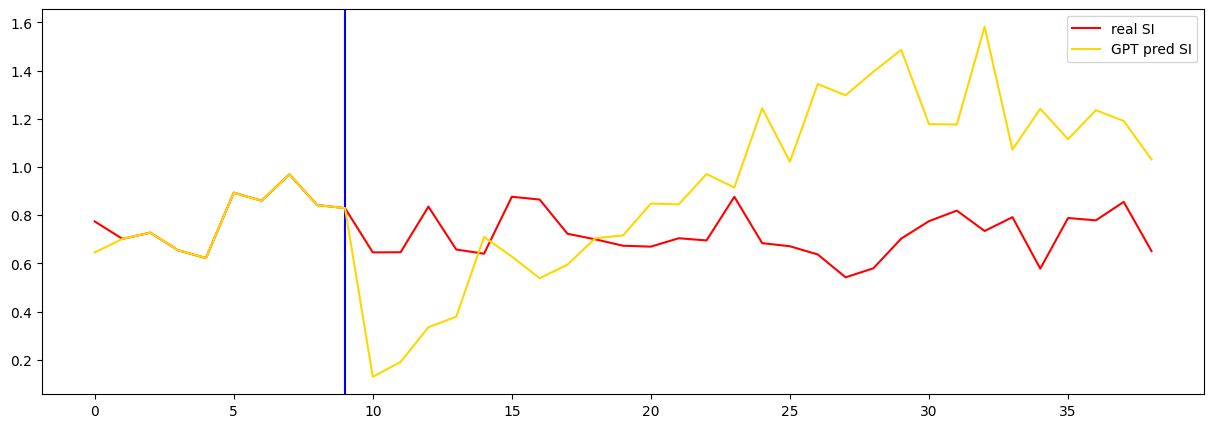

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  919.8672485351562
seq length of pred =  30
[ 3.37191797  2.86781206 15.66367743 32.11563349  1.02858895  0.57290589]
[tensor(2.0572, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2308, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.59084701538086
seq length of pred =  30
[ 3.27175898  1.86824444 11.85523017 19.88029562  0.56864033  0.36114834]
[tensor(1.1373, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0498, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  17.58883285522461
seq length of pred =  30
[ 3.44446413  2.0607078  11.95827688 20.07809432  0.59331639  0.35666924]
[tensor(1.1866, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9642, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  4.75313663482666
seq length of pred =  30
[ 3.1604646   1.92481454 11.84347108 19.42306484  0.55932371  0.34943494]
[tensor(1.1186, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9853, device='cuda:0'

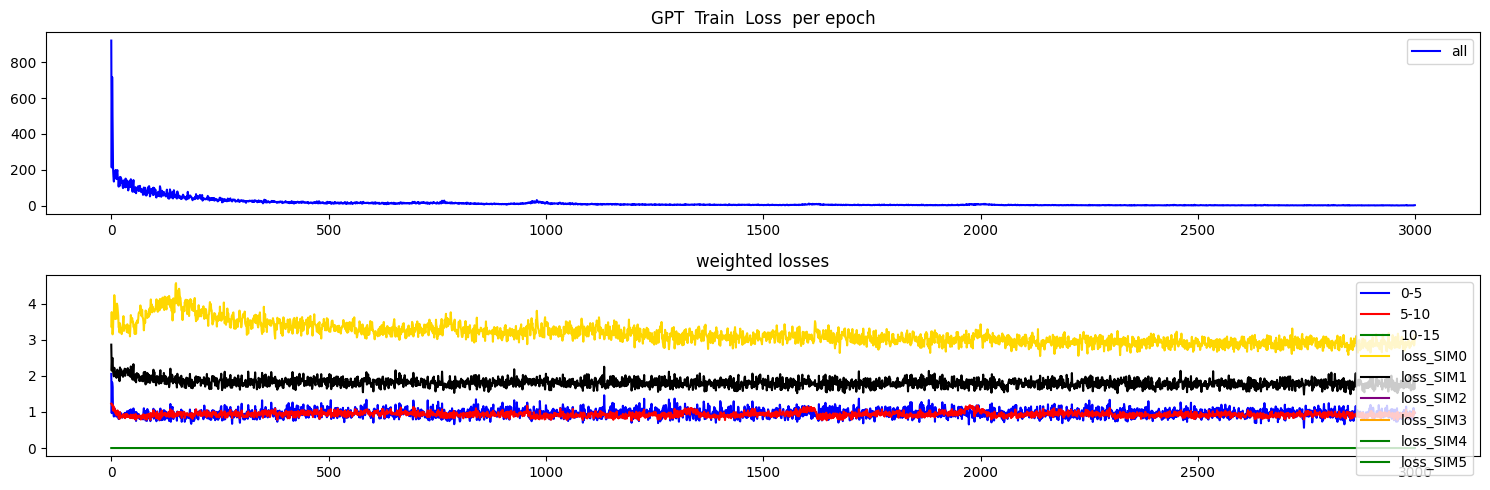

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.024564050137996674
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.04956480860710144
Test MSE Loss - SI only 10-15:  0.018620265647768974
mae, mse, rmse, mape, mspe, rse, corr
(0.12245715, 0.02456405, 0.15672922, 7.9388137, 902.67957, 1.3078)
Testing R**2 - SI only:  -0.710340986522098
Testing R**2 - SI only:  -0.710340986522098
Testing R**2 - All features:  0.9760213410171504
Testing R**2 - (f2) - SI full:  -13.1234149651432


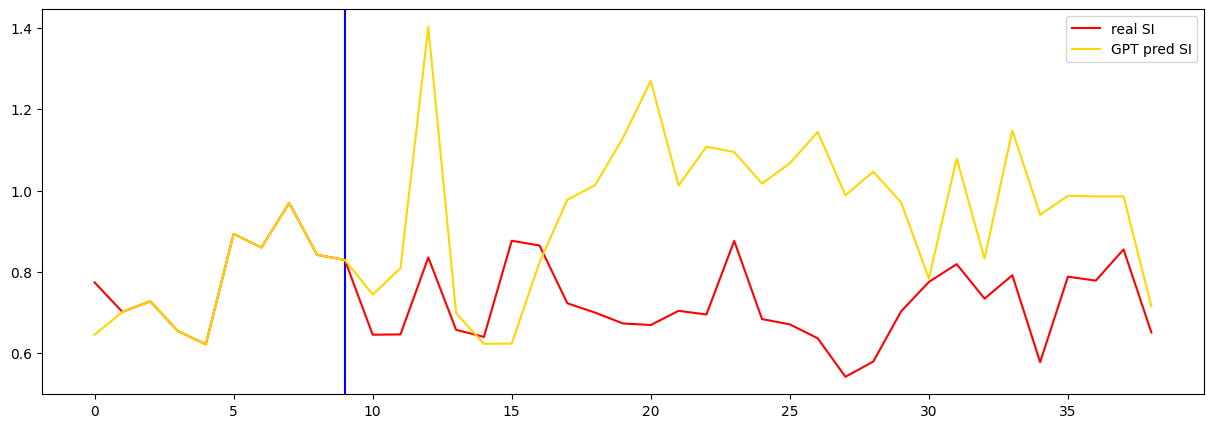

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1296.3988037109375
seq length of pred =  30
[ 3.82480334  3.33391852 18.17481934 33.28021669  1.202775    0.59782019]
[tensor(2.4056, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3924, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  5.895938873291016
seq length of pred =  30
[ 2.61486316  2.19612623 12.79378663 19.43258052  0.63062001  0.35278161]
[tensor(1.2612, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0998, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  3.15224552154541
seq length of pred =  30
[ 2.52838051  2.31514814 12.44161243 18.31880192  0.60340485  0.33173599]
[tensor(1.2068, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0906, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  3.957711696624756
seq length of pred =  30
[ 2.32650098  2.58459601 13.00827199 19.52349976  0.7196013   0.35425017]
[tensor(1.4392, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0502, device='cuda:0

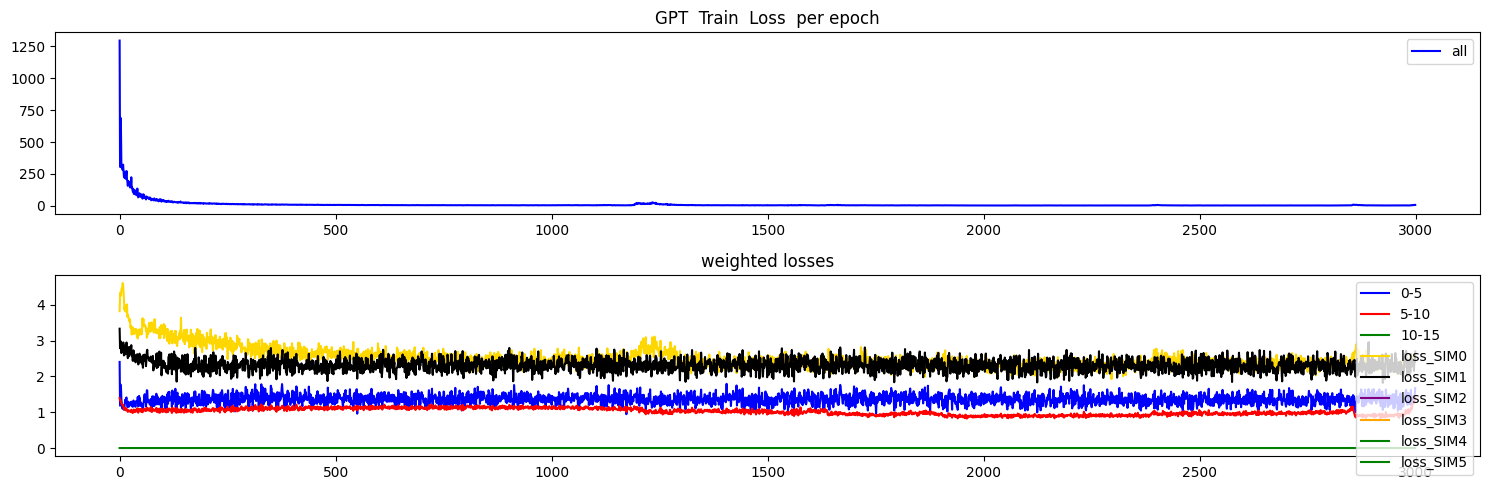

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.05319584161043167
Test MSE Loss - SI only 0-5:  0.07121264934539795
Test MSE Loss - SI only 5-10:  0.11918197572231293
Test MSE Loss - SI only 10-15:  0.02106228470802307
mae, mse, rmse, mape, mspe, rse, corr
(0.18929376, 0.05319584, 0.23064224, 18.162283, 8770.708, 1.5435003)
Testing R**2 - SI only:  -1.3823933615479702
Testing R**2 - SI only:  -1.3823933615479702
Testing R**2 - All features:  0.824004126153943
Testing R**2 - (f2) - SI full:  -19.229104857409485


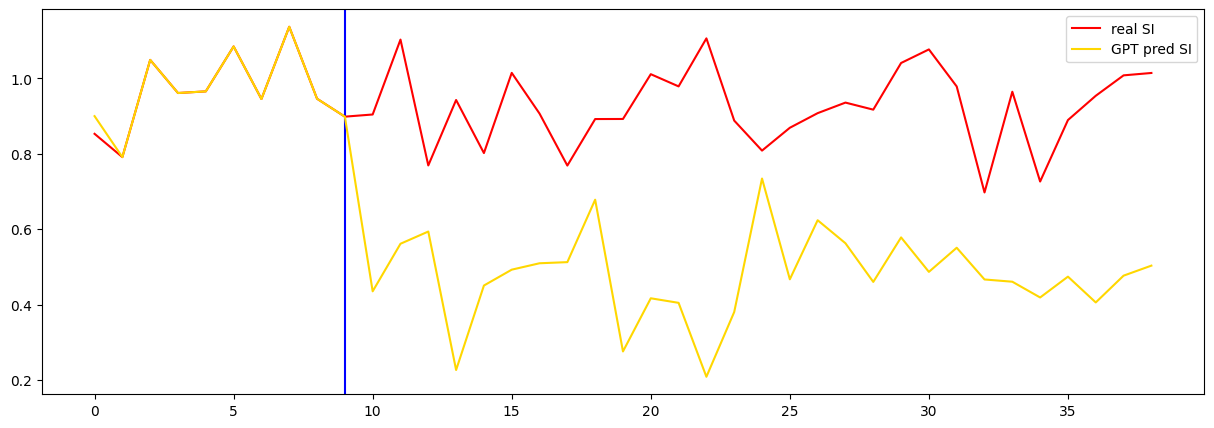

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  650.1328735351562
seq length of pred =  30
[ 4.00441449  2.86875068 16.83103705 29.62513378  0.90451692  0.52670735]
[tensor(1.8090, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2915, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.20142650604248
seq length of pred =  30
[ 3.07420077  2.15526413 12.48503159 20.68706481  0.61760274  0.36736599]
[tensor(1.2352, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0157, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  7.595556259155273
seq length of pred =  30
[ 2.64079839  2.03513225 12.32605958 19.86319037  0.59485295  0.35589374]
[tensor(1.1897, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9696, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  6.048144817352295
seq length of pred =  30
[ 2.67819013  2.3711347  13.45652565 21.52328375  0.73092057  0.38866544]
[tensor(1.4618, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0589, device='cuda:0

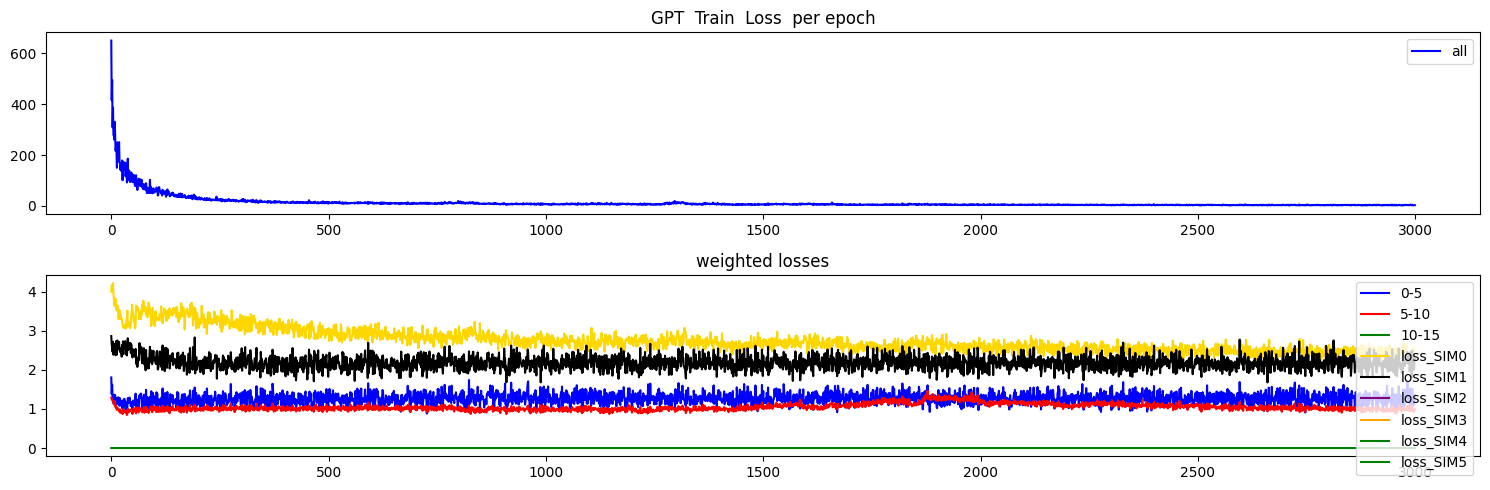

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.06395721435546875
Test MSE Loss - SI only 0-5:  0.07121264934539795
Test MSE Loss - SI only 5-10:  0.11579225212335587
Test MSE Loss - SI only 10-15:  0.08087462931871414
mae, mse, rmse, mape, mspe, rse, corr
(0.20401862, 0.06395721, 0.25289762, 9.742007, 1481.3387, 1.6924373)
Testing R**2 - SI only:  -1.8643446943384898
Testing R**2 - SI only:  -1.8643446943384898
Testing R**2 - All features:  0.9796177892430613
Testing R**2 - (f2) - SI full:  -6.669979104375388


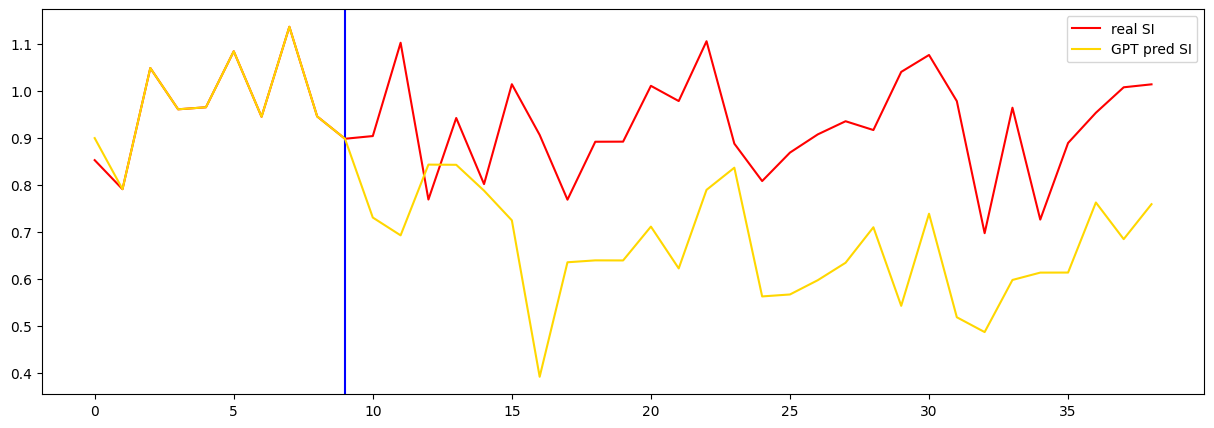

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  1095.3668212890625
seq length of pred =  30
[ 3.4074432   3.20378981 14.22073434 24.84895486  0.83962332  0.43687188]
[tensor(1.6792, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2635, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  18.452350616455078
seq length of pred =  30
[ 3.57746135  2.11360061 10.72145912 17.8605601   0.54624828  0.31316612]
[tensor(1.0925, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8753, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  12.432496070861816
seq length of pred =  30
[ 3.60557476  2.12956    10.83372092 18.06889435  0.674189    0.32168218]
[tensor(1.3484, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8447, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  4.845332622528076
seq length of pred =  30
[ 3.1762173   1.64849315  9.44737274 15.36535553  0.46893728  0.28085643]
[tensor(0.9379, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7826, device='cud

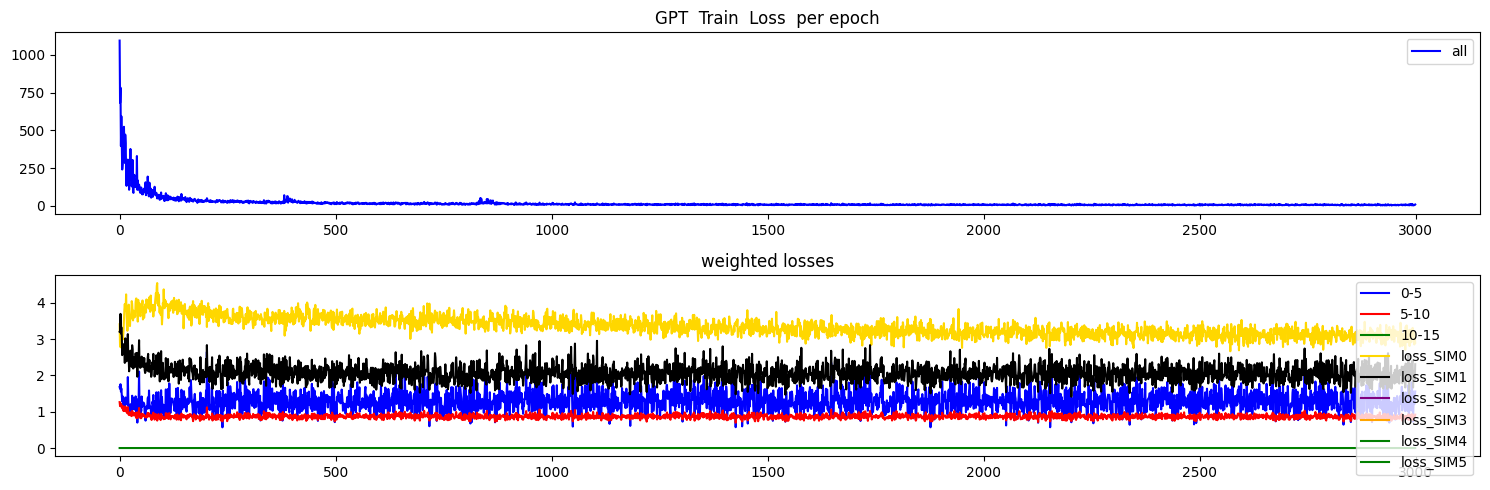

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.04705421254038811
Test MSE Loss - SI only 0-5:  0.07121264934539795
Test MSE Loss - SI only 5-10:  0.04095827788114548
Test MSE Loss - SI only 10-15:  0.021590959280729294
mae, mse, rmse, mape, mspe, rse, corr
(0.18275276, 0.047054216, 0.21691984, 10.591242, 1928.5878, 1.4516674)
Testing R**2 - SI only:  -1.1073385317703512
Testing R**2 - SI only:  -1.1073385317703512
Testing R**2 - All features:  0.9645838442125135
Testing R**2 - (f2) - SI full:  -1.9432241599902227


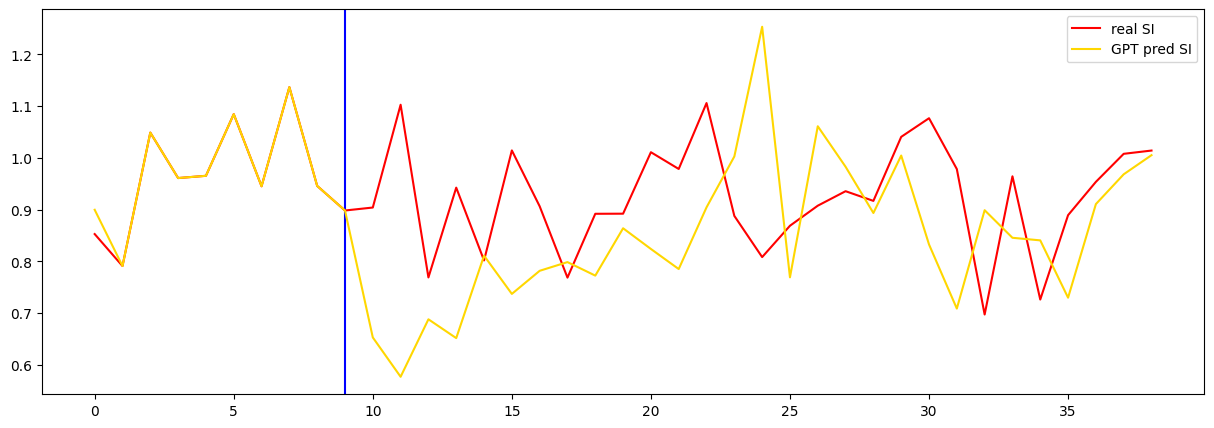

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  1260.7979736328125
seq length of pred =  30
[ 3.76329206  2.75647239 14.42318196 26.95699179  0.84148021  0.47601832]
[tensor(1.6830, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1912, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.055868148803711
seq length of pred =  30
[ 3.58979699  2.13696877 10.7114769  18.21113014  0.59820369  0.31797156]
[tensor(1.1964, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8214, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  8.634455680847168
seq length of pred =  30
[ 3.55012444  1.73749046  9.98667403 17.06237824  0.51316116  0.30274753]
[tensor(1.0263, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8146, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  3.9690194129943848
seq length of pred =  30
[ 3.10711217  1.60491262  9.08590581 15.59737409  0.37513881  0.27475654]
[tensor(0.7503, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7498, device='cud

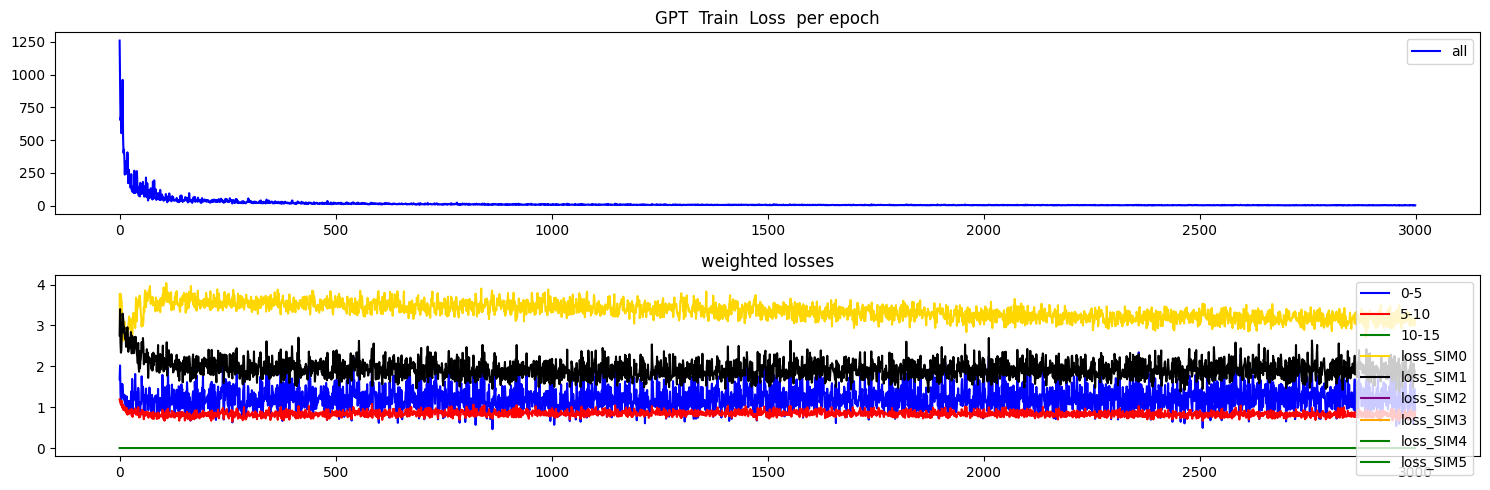

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.056143492460250854
Test MSE Loss - SI only 0-5:  0.07121264934539795
Test MSE Loss - SI only 5-10:  0.06485818326473236
Test MSE Loss - SI only 10-15:  0.05041211098432541
mae, mse, rmse, mape, mspe, rse, corr
(0.19554584, 0.056143485, 0.23694617, 21.438585, 13651.743, 1.5856873)
Testing R**2 - SI only:  -1.5144046490307685
Testing R**2 - SI only:  -1.5144046490307685
Testing R**2 - All features:  0.953274214882858
Testing R**2 - (f2) - SI full:  -3.489837452513016


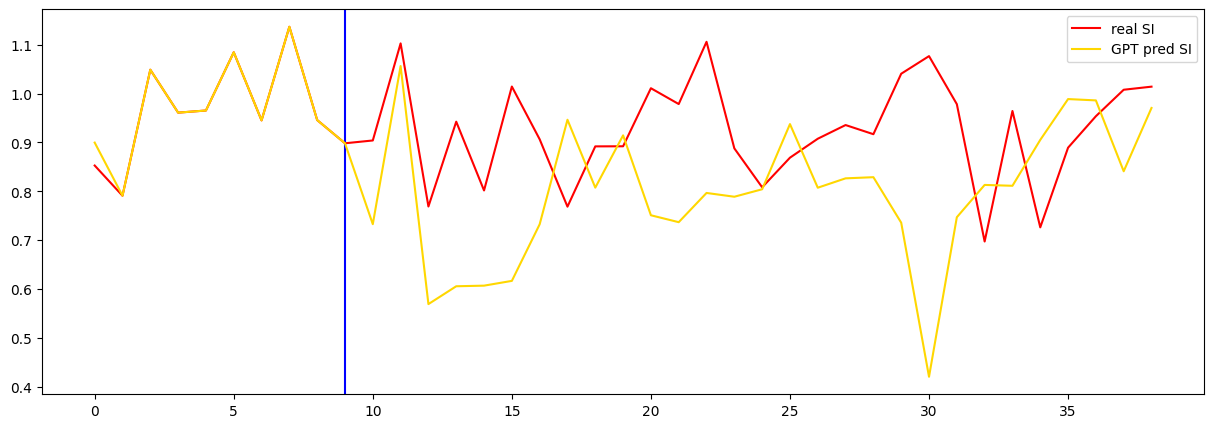

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  271.0927429199219
seq length of pred =  30
[ 3.75726791  2.23255366 16.91687388 29.20148689  0.89931257  0.53281309]
[tensor(1.7986, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4159, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  5.830692768096924
seq length of pred =  30
[ 2.5372551   1.82660687 13.20509519 22.25479808  0.64235898  0.41317191]
[tensor(1.2847, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0228, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  4.162075042724609
seq length of pred =  30
[ 2.17860294  1.8652161  13.77502667 22.95278682  0.72922644  0.43472281]
[tensor(1.4585, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9524, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  2.876072406768799
seq length of pred =  30
[ 2.13958622  1.77065722 13.14264033 22.12948298  0.66503675  0.41055001]
[tensor(1.3301, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9881, device='cuda:0

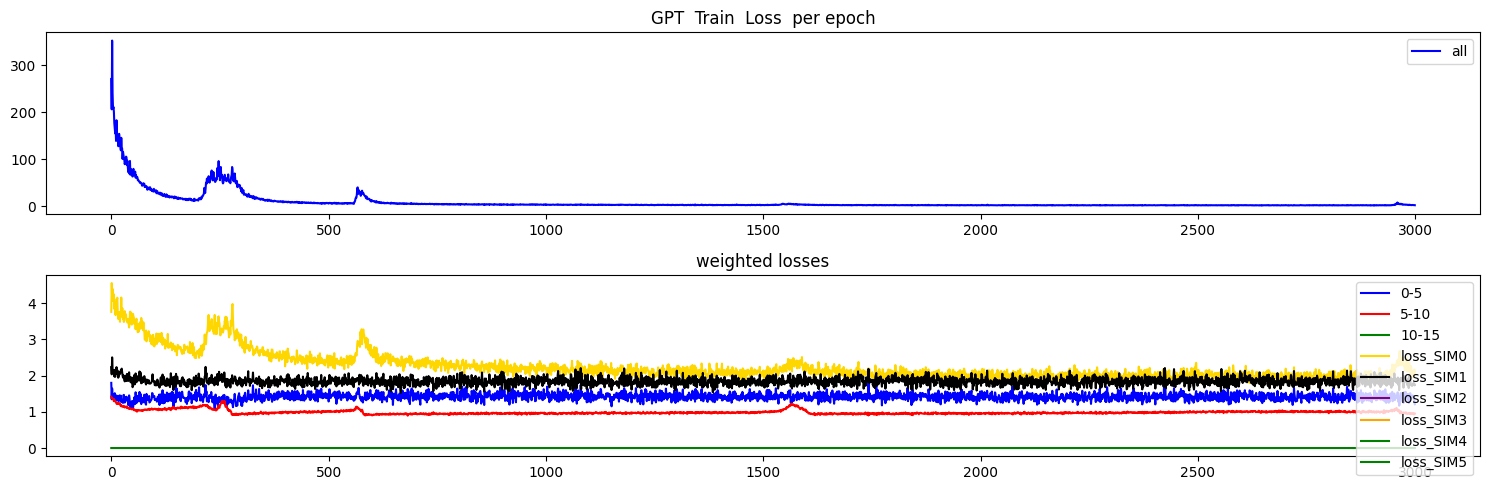

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.13070061802864075
Test MSE Loss - SI only 0-5:  0.04502587020397186
Test MSE Loss - SI only 5-10:  0.06853698939085007
Test MSE Loss - SI only 10-15:  0.44611936807632446
mae, mse, rmse, mape, mspe, rse, corr
(0.2632414, 0.13070065, 0.36152545, 2.870931, 26.053596, 1.1764109)
Testing R**2 - SI only:  -0.38394251638493193
Testing R**2 - SI only:  -0.38394251638493193
Testing R**2 - All features:  0.6135146677601535
Testing R**2 - (f2) - SI full:  -2.6848614963970556


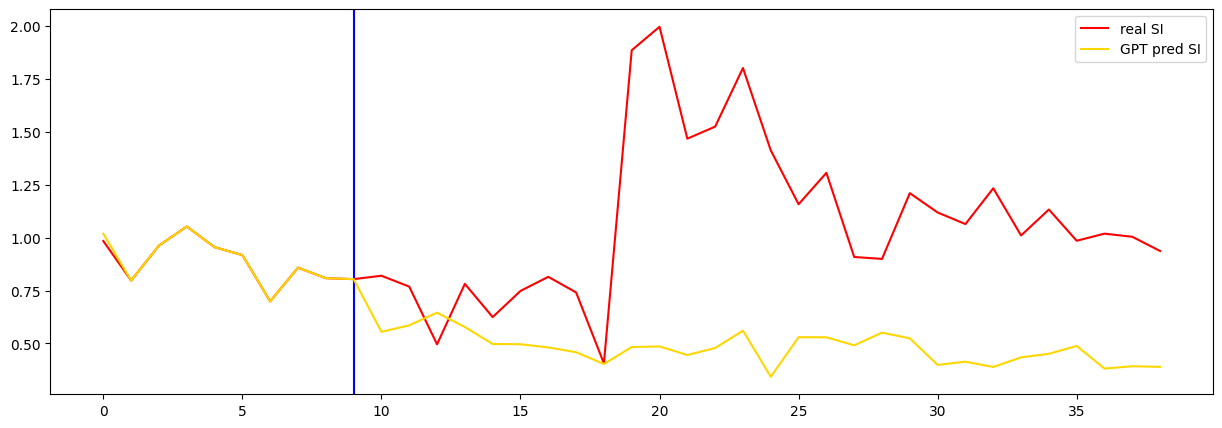

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  139.8820037841797
seq length of pred =  30
[ 3.47662887  1.81608668 11.06431704 22.35527701  0.46906987  0.39072181]
[tensor(0.9381, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9699, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  3.1474921703338623
seq length of pred =  30
[ 3.49346276  1.36554471  8.05896489 14.10468813  0.22735702  0.24504442]
[tensor(0.4547, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7604, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  2.6041555404663086
seq length of pred =  30
[ 3.57256876  1.28596232  7.45401193 13.30499114  0.20131897  0.23119749]
[tensor(0.4026, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.6534, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  1.4240262508392334
seq length of pred =  30
[ 3.43652921  1.25865031  7.11329691 12.75548748  0.19494197  0.22208567]
[tensor(0.3899, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9295, device='cud

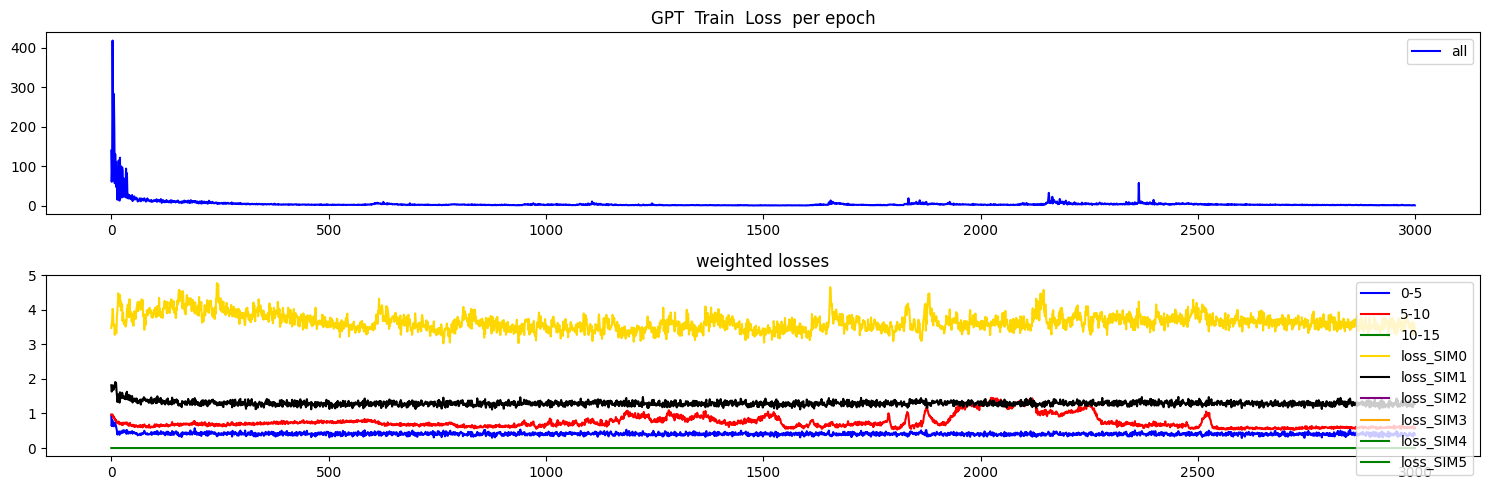

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.126556858420372
Test MSE Loss - SI only 0-5:  0.04502587020397186
Test MSE Loss - SI only 5-10:  0.07139633595943451
Test MSE Loss - SI only 10-15:  0.39173221588134766
mae, mse, rmse, mape, mspe, rse, corr
(0.2589576, 0.12655686, 0.3557483, 2.9290984, 29.555517, 1.157612)
Testing R**2 - SI only:  -0.34006570410226744
Testing R**2 - SI only:  -0.34006570410226744
Testing R**2 - All features:  0.8313106382604936
Testing R**2 - (f2) - SI full:  -0.5687250737253289


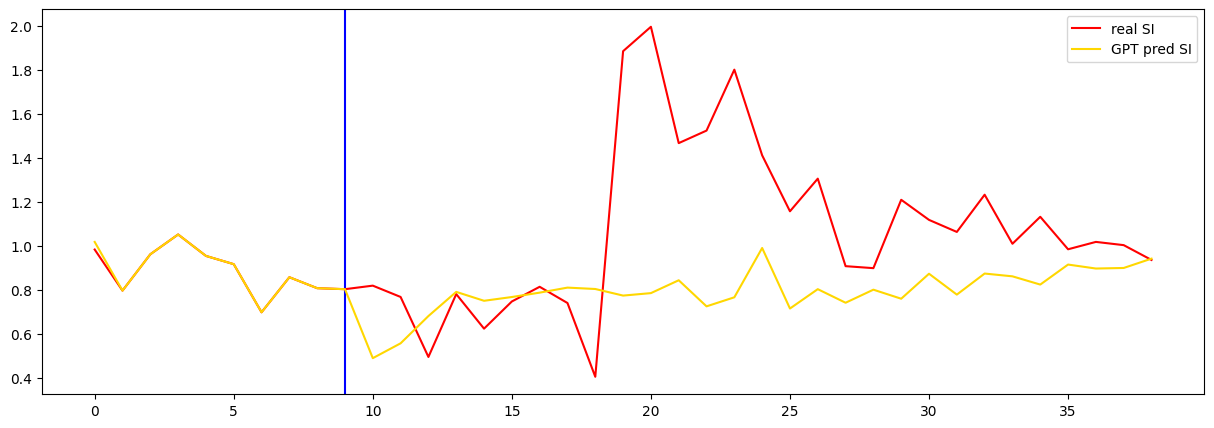

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  1034.25
seq length of pred =  30
[ 3.18566482  2.42955595 13.05518435 24.93665449  0.67089858  0.43517913]
[tensor(1.3418, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0518, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  12.926791191101074
seq length of pred =  30
[ 3.86908821  1.61035547  9.07879454 16.15565769  0.36027084  0.28088312]
[tensor(0.7205, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8069, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  6.860442638397217
seq length of pred =  30
[ 3.63052737  1.97788806  9.74646694 17.33986877  0.56890931  0.30351044]
[tensor(1.1378, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8955, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  10.521217346191406
seq length of pred =  30
[ 3.61432442  2.129323   10.61386513 17.1970652   0.77839656  0.31653067]
[tensor(1.5568, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.8389, device='cuda:0', grad_

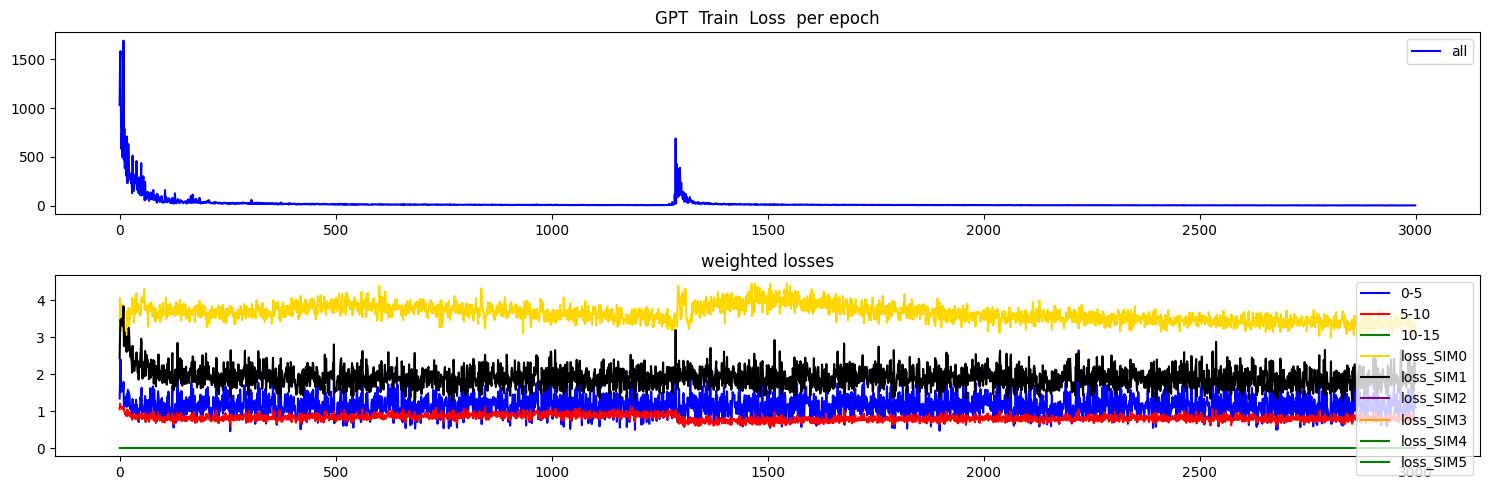

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.12125089764595032
Test MSE Loss - SI only 0-5:  0.04502587020397186
Test MSE Loss - SI only 5-10:  0.04153323918581009
Test MSE Loss - SI only 10-15:  0.5098909735679626
mae, mse, rmse, mape, mspe, rse, corr
(0.23163746, 0.12125088, 0.34821096, 1.8887756, 7.7329235, 1.1330854)
Testing R**2 - SI only:  -0.283882635611165
Testing R**2 - SI only:  -0.283882635611165
Testing R**2 - All features:  0.8301577184452638
Testing R**2 - (f2) - SI full:  -3.3467438441064656


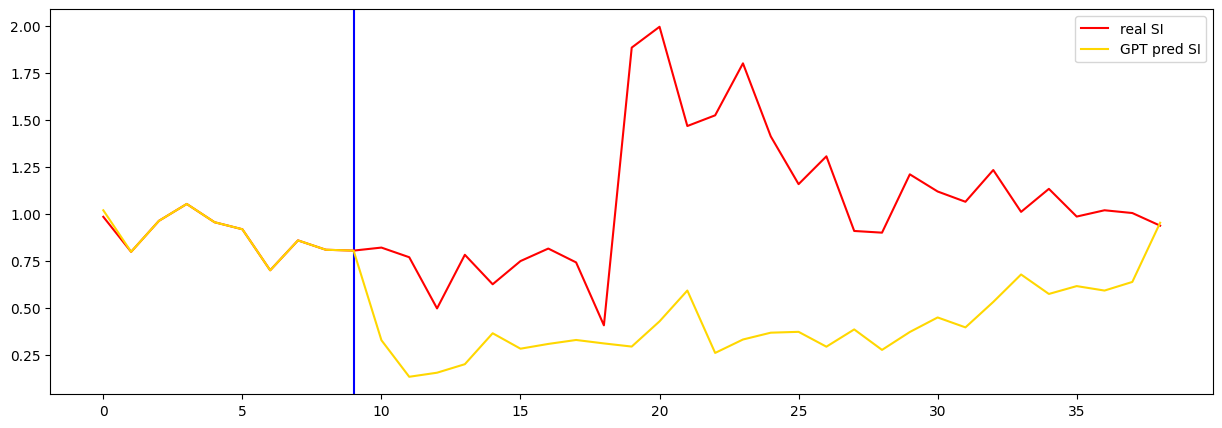

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  1325.020751953125
seq length of pred =  30
[ 3.55213882  2.56751763 13.91116861 29.01309504  0.9426323   0.5197552 ]
[tensor(1.8853, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1895, device='cuda:0', grad_fn=<MseLossBackward0>)]
500 train loss =  15.336511611938477
seq length of pred =  30
[ 3.61634269  1.57331599  8.93503928 16.41274572  0.42620341  0.2860913 ]
[tensor(0.8524, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7553, device='cuda:0', grad_fn=<MseLossBackward0>)]
1000 train loss =  7.435939788818359
seq length of pred =  30
[ 3.73334451  1.47419851  8.19615766 15.31423184  0.34035698  0.26958994]
[tensor(0.6807, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7144, device='cuda:0', grad_fn=<MseLossBackward0>)]
1500 train loss =  5.873824596405029
seq length of pred =  30
[ 3.52988968  1.61914582  9.40703929 16.59207819  0.50626009  0.29138327]
[tensor(1.0125, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.7518, device='cuda:

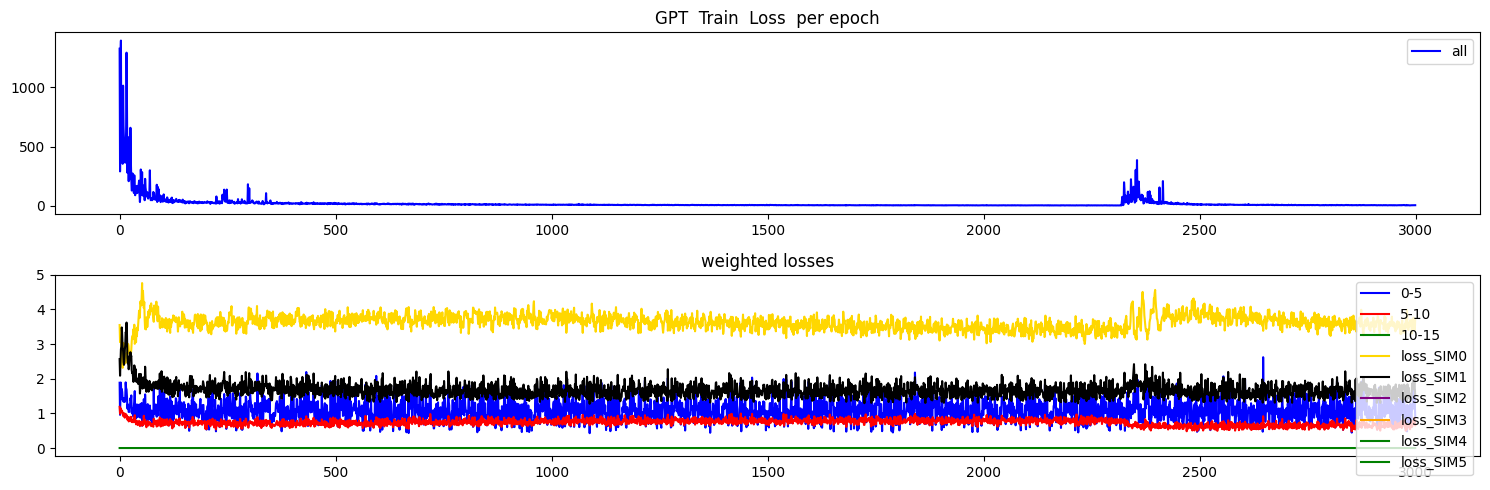

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.1049705520272255
Test MSE Loss - SI only 0-5:  0.04502587020397186
Test MSE Loss - SI only 5-10:  0.036582399159669876
Test MSE Loss - SI only 10-15:  0.45817023515701294
mae, mse, rmse, mape, mspe, rse, corr
(0.21368897, 0.10497055, 0.3239916, 1.9500452, 10.691293, 1.054275)
Testing R**2 - SI only:  -0.11149583860311885
Testing R**2 - SI only:  -0.11149583860311885
Testing R**2 - All features:  0.5226626789435431
Testing R**2 - (f2) - SI full:  -3.1539279008814782


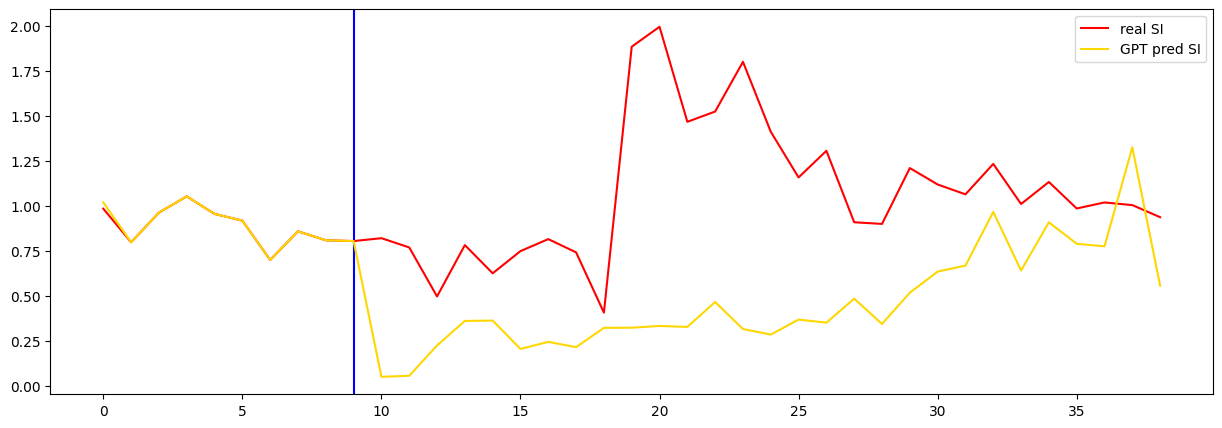

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )



## Train on Train, Test on Train



## 000 to 015


In [ ]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
